In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import altair as alt
from vega_datasets import data
import plotly.graph_objects as go
from matplotlib.pyplot import figure
from plotly.subplots import make_subplots

In [5]:
df = pd.read_csv('POMC_Cleaned_Update920.csv')
pd.set_option('display.max_columns', None)
df_20 = pd.read_csv('2020_POMC_Report_Cleaned.csv')
df_2 = pd.read_csv('2020_POMC_Report_Cleaned.csv')

In [4]:
df.head()

,Year,Month_name,Month_num,Age,Age_Range,Sex,Diagnosis,Treatment,Meds,Acyclo Cream,Acyclovir,Advised,Albendazole,Amitriptyline,Amlodipine,Amoxicillin,Amoxikid,Ampiclox,Ampilox,Anusol Gel,Aprinox,Artesunate,Ascorbic Acid,Ascoril,Ascoril Syrup,Aspirin,Atenolol,Azithromycin,Bed Rest,Bendro,Bisacodyl,BP Monitoring,Caf Ear Drops,Caf Eye Drops,Calamine Lotion,Calcium,Calcium Lactate,Calcium Lactatea,Candiderm Cream,Captopril,Carbamazepine,Cardiac Asa,Catheter Removal,CBC,Cefixime,Cefiximkid,Cetamol Syrup,Cetirizine,Chlorhexidine Mouth Wash,Chlorphenamine,Chlorphenical Ear Drops,Chlorpheniramine,Cimetidine,Ciprofloxacin,Clotri Pessaries,Clotrimazole Cream,Coartem,Cocs,Cold Compress,Cotimoxkid,Cotrimoxazole,Cough Linctus,Counseling,CTX,Dexamethasone,Diazepam,Diclofenac Gel,Doxycycline,Dressing,Duocotexin,Ear Syringing,EBF,Erythromycin,F/A,Fansidar,Fefo,Ferrous Sulphate,Flucamoxkid,Fluconazole,Folic Acid,Furosemide,Glibenclamide,Glycerin Borax,Gripe Water,Griseofulvin,HCG,HCT,Hydrocortisone Cream,Ibuprofen,Ibuprokid,Indocid,Lasortern,Levofloxacin,Losarton,Magnesium,Magnesium Trisilicate,Matronidazol,Mebendazole,Medical Check Up,Medicated Soap,Mefenamic Acid,Mentronidazole,Metformin,Metronidazole,Microgynon,MultiVits,Nalidixic Acid,Nifedipine,No Meds,Nyst Pessaries,Nystakid,Nystatin Oral Suspension,ORS,Omeprazole,Paracetamol,Permethrin Cream,Phenytoin,Piritex,Piriton,Prednisolone,Probeta-N,Propranolol,Quinine,Reassurance,Rectal Diazepam,Referred,Results Given,Reythromycin,Salbutamol Inhaler,Silver Sulfadiazine,Synclav,Tapid Sponging,Teo,Tested And Results Given,Tetracycline Eye Ointment,Vendor,Vitamin A,Vitamin B6,Vitamin Bx,Vitamin C,Zinc Sulfate,Zinkid,Zycel
0,2019,January,1,0,<1,1,Diarrhoea,"Zinc Sulfate, ORS",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2019,January,1,32,25-45,0,"Pid, V.cadidiasis","Metronidazole, Doxycycline, Cefixime, Nyst Pes...",4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019,January,1,6,5-18,0,Abscess,"Azithromycin, Ibuprofen",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019,January,1,28,25-45,1,Allegic Skin Rxn,"Cetirizine, Hydrocortisone Cream",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019,January,1,45,25-45,1,Arthritis,"Paracetamol, Zycel",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
df.columns.values

array(['Year', 'Month_name', 'Month_num', 'Age', 'Age_Range', 'Sex',
       'Diagnosis', 'Treatment', 'Meds', 'Acyclo Cream', 'Acyclovir',
       'Advised', 'Albendazole', 'Amitriptyline', 'Amlodipine',
       'Amoxicillin', 'Amoxikid', 'Ampiclox', 'Ampilox', 'Anusol Gel',
       'Aprinox', 'Artesunate', 'Ascorbic Acid', 'Ascoril',
       'Ascoril Syrup', 'Aspirin', 'Atenolol', 'Azithromycin', 'Bed Rest',
       'Bendro', 'Bisacodyl', 'BP Monitoring', 'Caf Ear Drops',
       'Caf Eye Drops', 'Calamine Lotion', 'Calcium', 'Calcium Lactate',
       'Calcium Lactatea', 'Candiderm Cream', 'Captopril',
       'Carbamazepine', 'Cardiac Asa', 'Catheter Removal', 'CBC',
       'Cefixime', 'Cefiximkid', 'Cetamol Syrup', 'Cetirizine',
       'Chlorhexidine Mouth Wash', 'Chlorphenamine',
       'Chlorphenical Ear Drops', 'Chlorpheniramine', 'Cimetidine',
       'Ciprofloxacin', 'Clotri Pessaries', 'Clotrimazole Cream',
       'Coartem', 'Cocs', 'Cold Compress', 'Cotimoxkid', 'Cotrimoxazole',
    

In [6]:
df_test = df[['Acyclo Cream', 'Acyclovir',
       'Advised', 'Albendazole', 'Amitriptyline', 'Amlodipine',
       'Amoxicillin', 'Amoxikid', 'Ampiclox', 'Ampilox', 'Anusol Gel',
       'Aprinox', 'Artesunate', 'Ascorbic Acid', 'Ascoril',
       'Ascoril Syrup', 'Aspirin', 'Atenolol', 'Azithromycin', 'Bed Rest',
       'Bendro', 'Bisacodyl', 'BP Monitoring', 'Caf Ear Drops',
       'Caf Eye Drops', 'Calamine Lotion', 'Calcium', 'Calcium Lactate',
       'Calcium Lactatea', 'Candiderm Cream', 'Captopril',
       'Carbamazepine', 'Cardiac Asa', 'Catheter Removal', 'CBC',
       'Cefixime', 'Cefiximkid', 'Cetamol Syrup', 'Cetirizine',
       'Chlorhexidine Mouth Wash', 'Chlorphenamine',
       'Chlorphenical Ear Drops', 'Chlorpheniramine', 'Cimetidine',
       'Ciprofloxacin', 'Clotri Pessaries', 'Clotrimazole Cream',
       'Coartem', 'Cocs', 'Cold Compress', 'Cotimoxkid', 'Cotrimoxazole',
       'Cough Linctus', 'Counseling', 'CTX', 'Dexamethasone', 'Diazepam',
       'Diclofenac Gel', 'Doxycycline', 'Dressing', 'Duocotexin',
       'Ear Syringing', 'EBF', 'Erythromycin', 'F/A', 'Fansidar', 'Fefo',
       'Ferrous Sulphate', 'Flucamoxkid', 'Fluconazole', 'Folic Acid',
       'Furosemide', 'Glibenclamide', 'Glycerin Borax', 'Gripe Water',
       'Griseofulvin', 'HCG', 'HCT', 'Hydrocortisone Cream', 'Ibuprofen',
       'Ibuprokid', 'Indocid', 'Lasortern', 'Levofloxacin', 'Losarton',
       'Magnesium', 'Magnesium Trisilicate', 'Matronidazol',
       'Mebendazole', 'Medical Check Up', 'Medicated Soap',
       'Mefenamic Acid', 'Mentronidazole', 'Metformin', 'Metronidazole',
       'Microgynon', 'MultiVits', 'Nalidixic Acid', 'Nifedipine',
       'No Meds', 'Nyst Pessaries', 'Nystakid',
       'Nystatin Oral Suspension', 'ORS', 'Omeprazole', 'Paracetamol',
       'Permethrin Cream', 'Phenytoin', 'Piritex', 'Piriton',
       'Prednisolone', 'Probeta-N', 'Propranolol', 'Quinine',
       'Reassurance', 'Rectal Diazepam', 'Referred', 'Results Given',
       'Reythromycin', 'Salbutamol Inhaler', 'Silver Sulfadiazine',
       'Synclav', 'Tapid Sponging', 'Teo', 'Tested And Results Given',
       'Tetracycline Eye Ointment', 'Vendor', 'Vitamin A', 'Vitamin B6',
       'Vitamin Bx', 'Vitamin C', 'Zinc Sulfate', 'Zinkid', 'Zycel']]


In [150]:
df_test.columns
pd.set_option('display.max_rows', 10)

# Finding the most distributed drug

In [7]:
Val = df_test.sum(axis=0).sort_values(ascending=False)
Top_Drugs = Val.head(15)
Top_Drugs

Paracetamol         1539
Coartem             1067
Chlorpheniramine     559
Amoxicillin          519
Metronidazole        328
Ibuprofen            297
Omeprazole           220
Cotrimoxazole        196
Nifedipine           190
Amoxikid             189
Albendazole          187
Magnesium            155
Bendro               137
Cetirizine           131
Doxycycline          123
dtype: int64

### Top drugs for 2020

In [641]:
drugs_20 = df_2.drugName.value_counts()
drugs_20 = pd.DataFrame(drugs_20)
drugs_20 = drugs_20.head(15)
drugs_20.rename(columns={'drugName' :'Values'}, inplace=True)
drugs_20['Drug'] = drugs_20.index
drugs_20 = drugs_20[['Drug', 'Values']]
drugs_20 = drugs_20.reset_index(drop=True)
drugs_20

,Drug,Values
0,Artemether_Lumefantrine,494
1,Amoxicillin,94
2,Nifedipine,69
3,Paracetamol,67
4,Ampiclox,35
...,...,...
10,Cefixime,18
11,Clotrimaz Pessaries,17
12,Griseofulvin,17
13,Erythromycin,15


## Top Drugs for 2019

In [630]:
top_drugs = pd.DataFrame(Top_Drugs)
top_drugs.rename(columns={0 :'Values'}, inplace=True)
top_drugs.index.names = ['Drug']
top_drugs['Drug'] = top_drugs.index
top_drugs = top_drugs[['Drug', 'Values']]
top_drugs

,Drug,Values
Drug,,
Paracetamol,Paracetamol,1539
Coartem,Coartem,1067
Chlorpheniramine,Chlorpheniramine,559
Amoxicillin,Amoxicillin,519
Metronidazole,Metronidazole,328
...,...,...
Albendazole,Albendazole,187
Magnesium,Magnesium,155
Bendro,Bendro,137


In [632]:
top_drugs = top_drugs.reset_index(drop=True)

In [633]:
top_drugs

,Drug,Values
0,Paracetamol,1539
1,Coartem,1067
2,Chlorpheniramine,559
3,Amoxicillin,519
4,Metronidazole,328
...,...,...
10,Albendazole,187
11,Magnesium,155
12,Bendro,137
13,Cetirizine,131


## Top drug graphs for 2020 and 2019

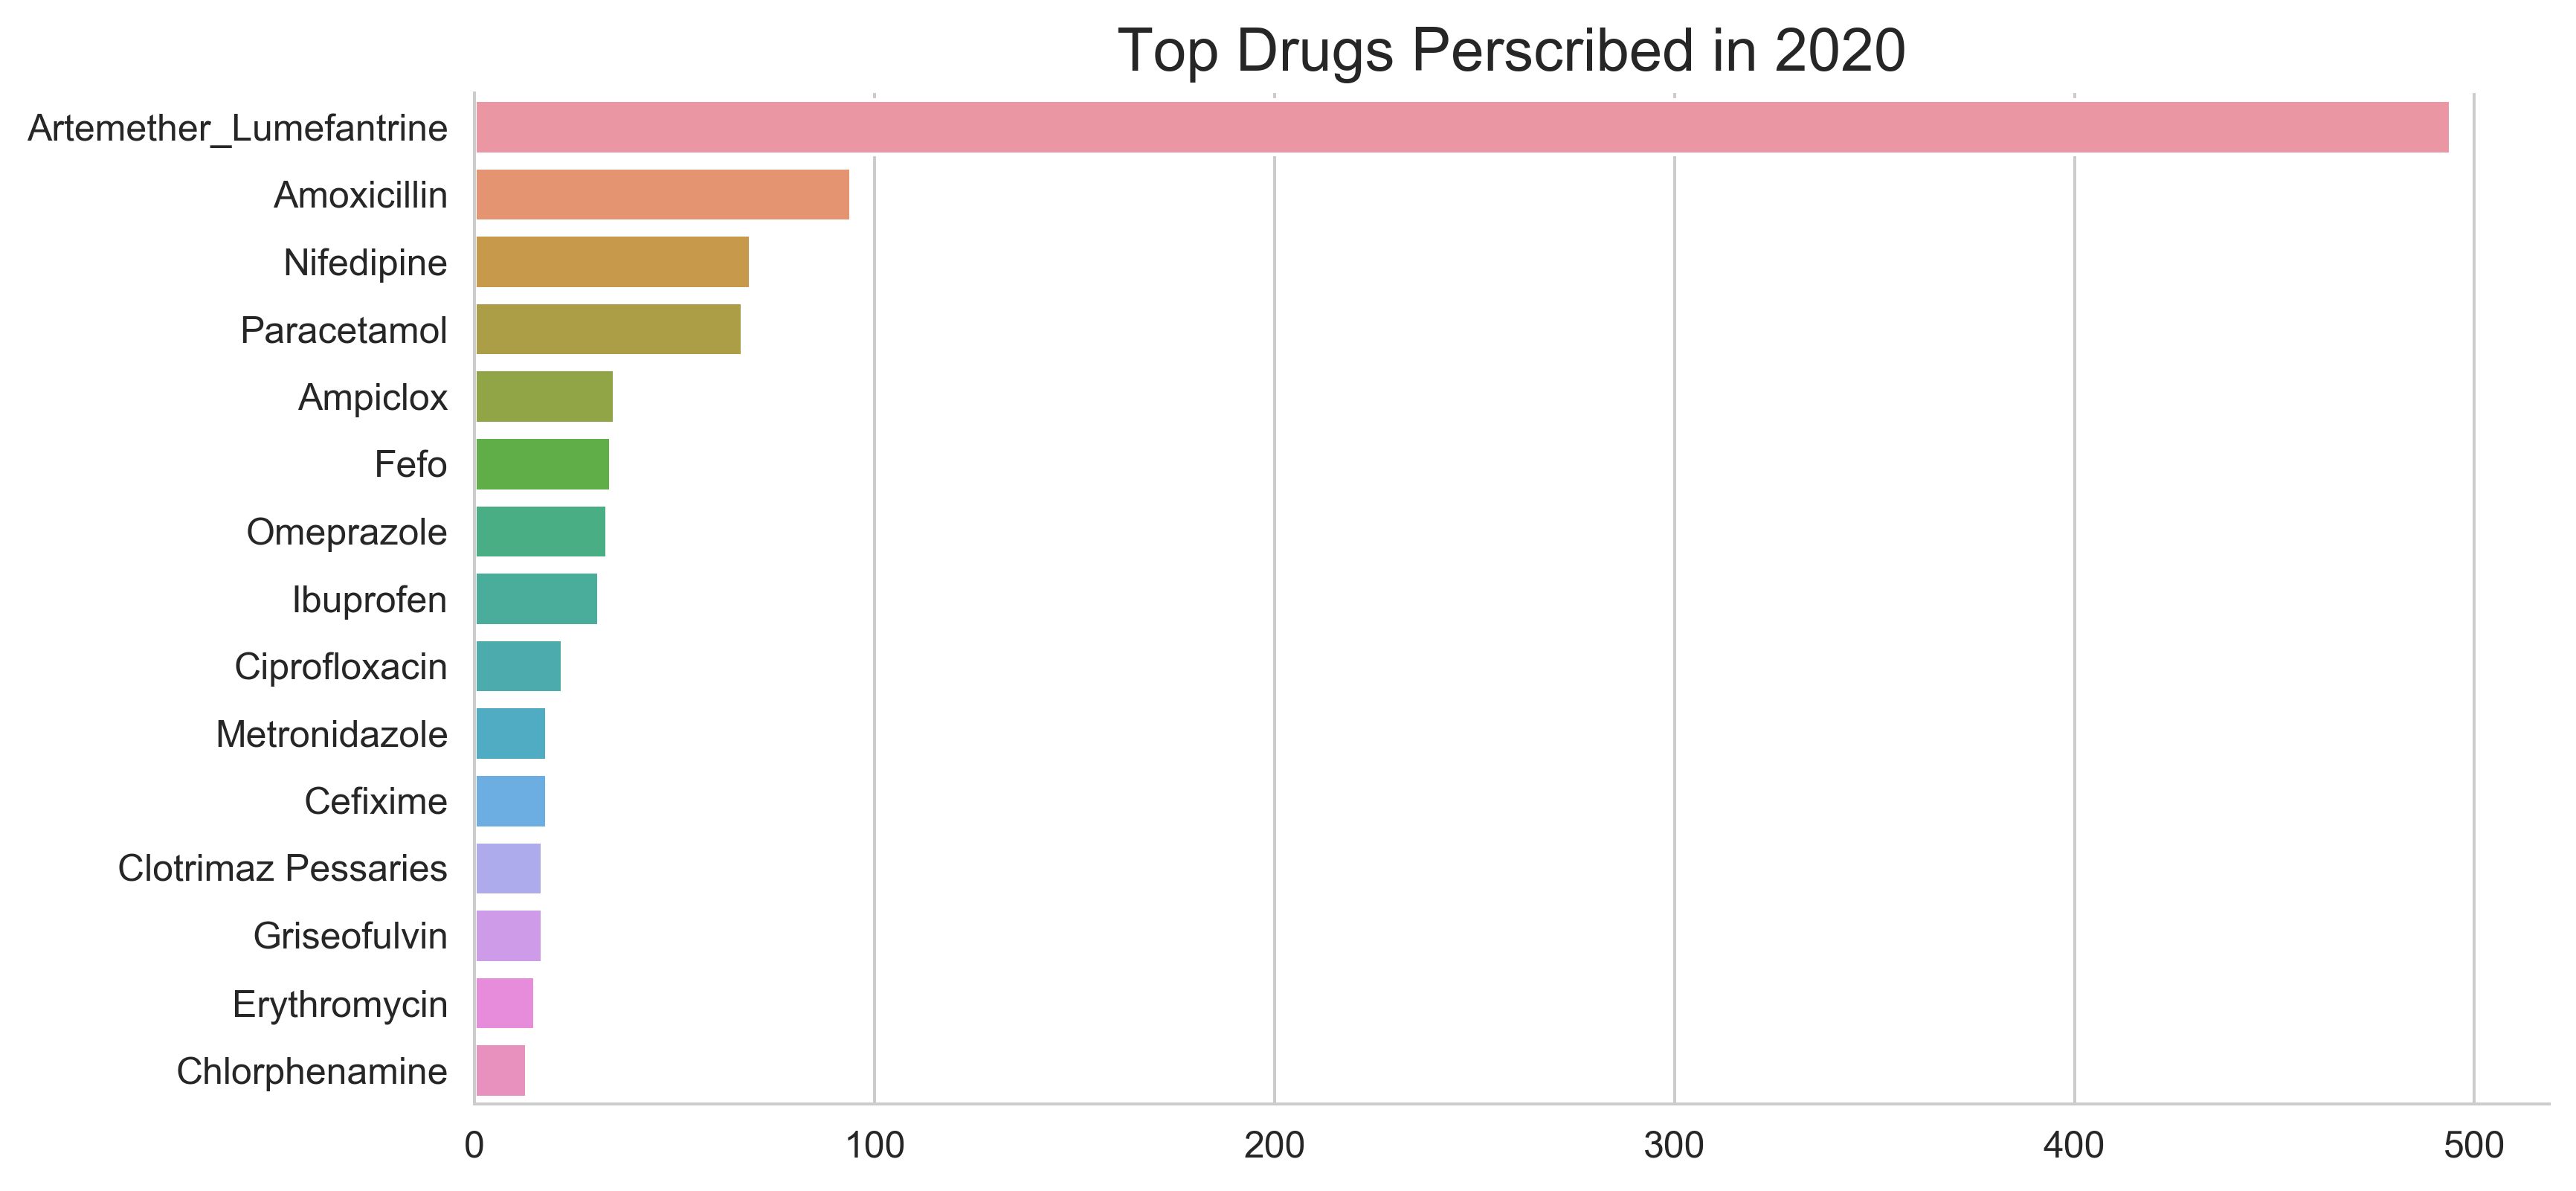

In [642]:
plt.rcParams['figure.dpi'] = 360
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(data=drugs_20, x='Values', y="Drug", ax=ax)
plt.xlabel('')
plt.ylabel('')
plt.title(('Top Drugs Perscribed in 2020'), fontsize=16)
sns.despine();
plt.show()

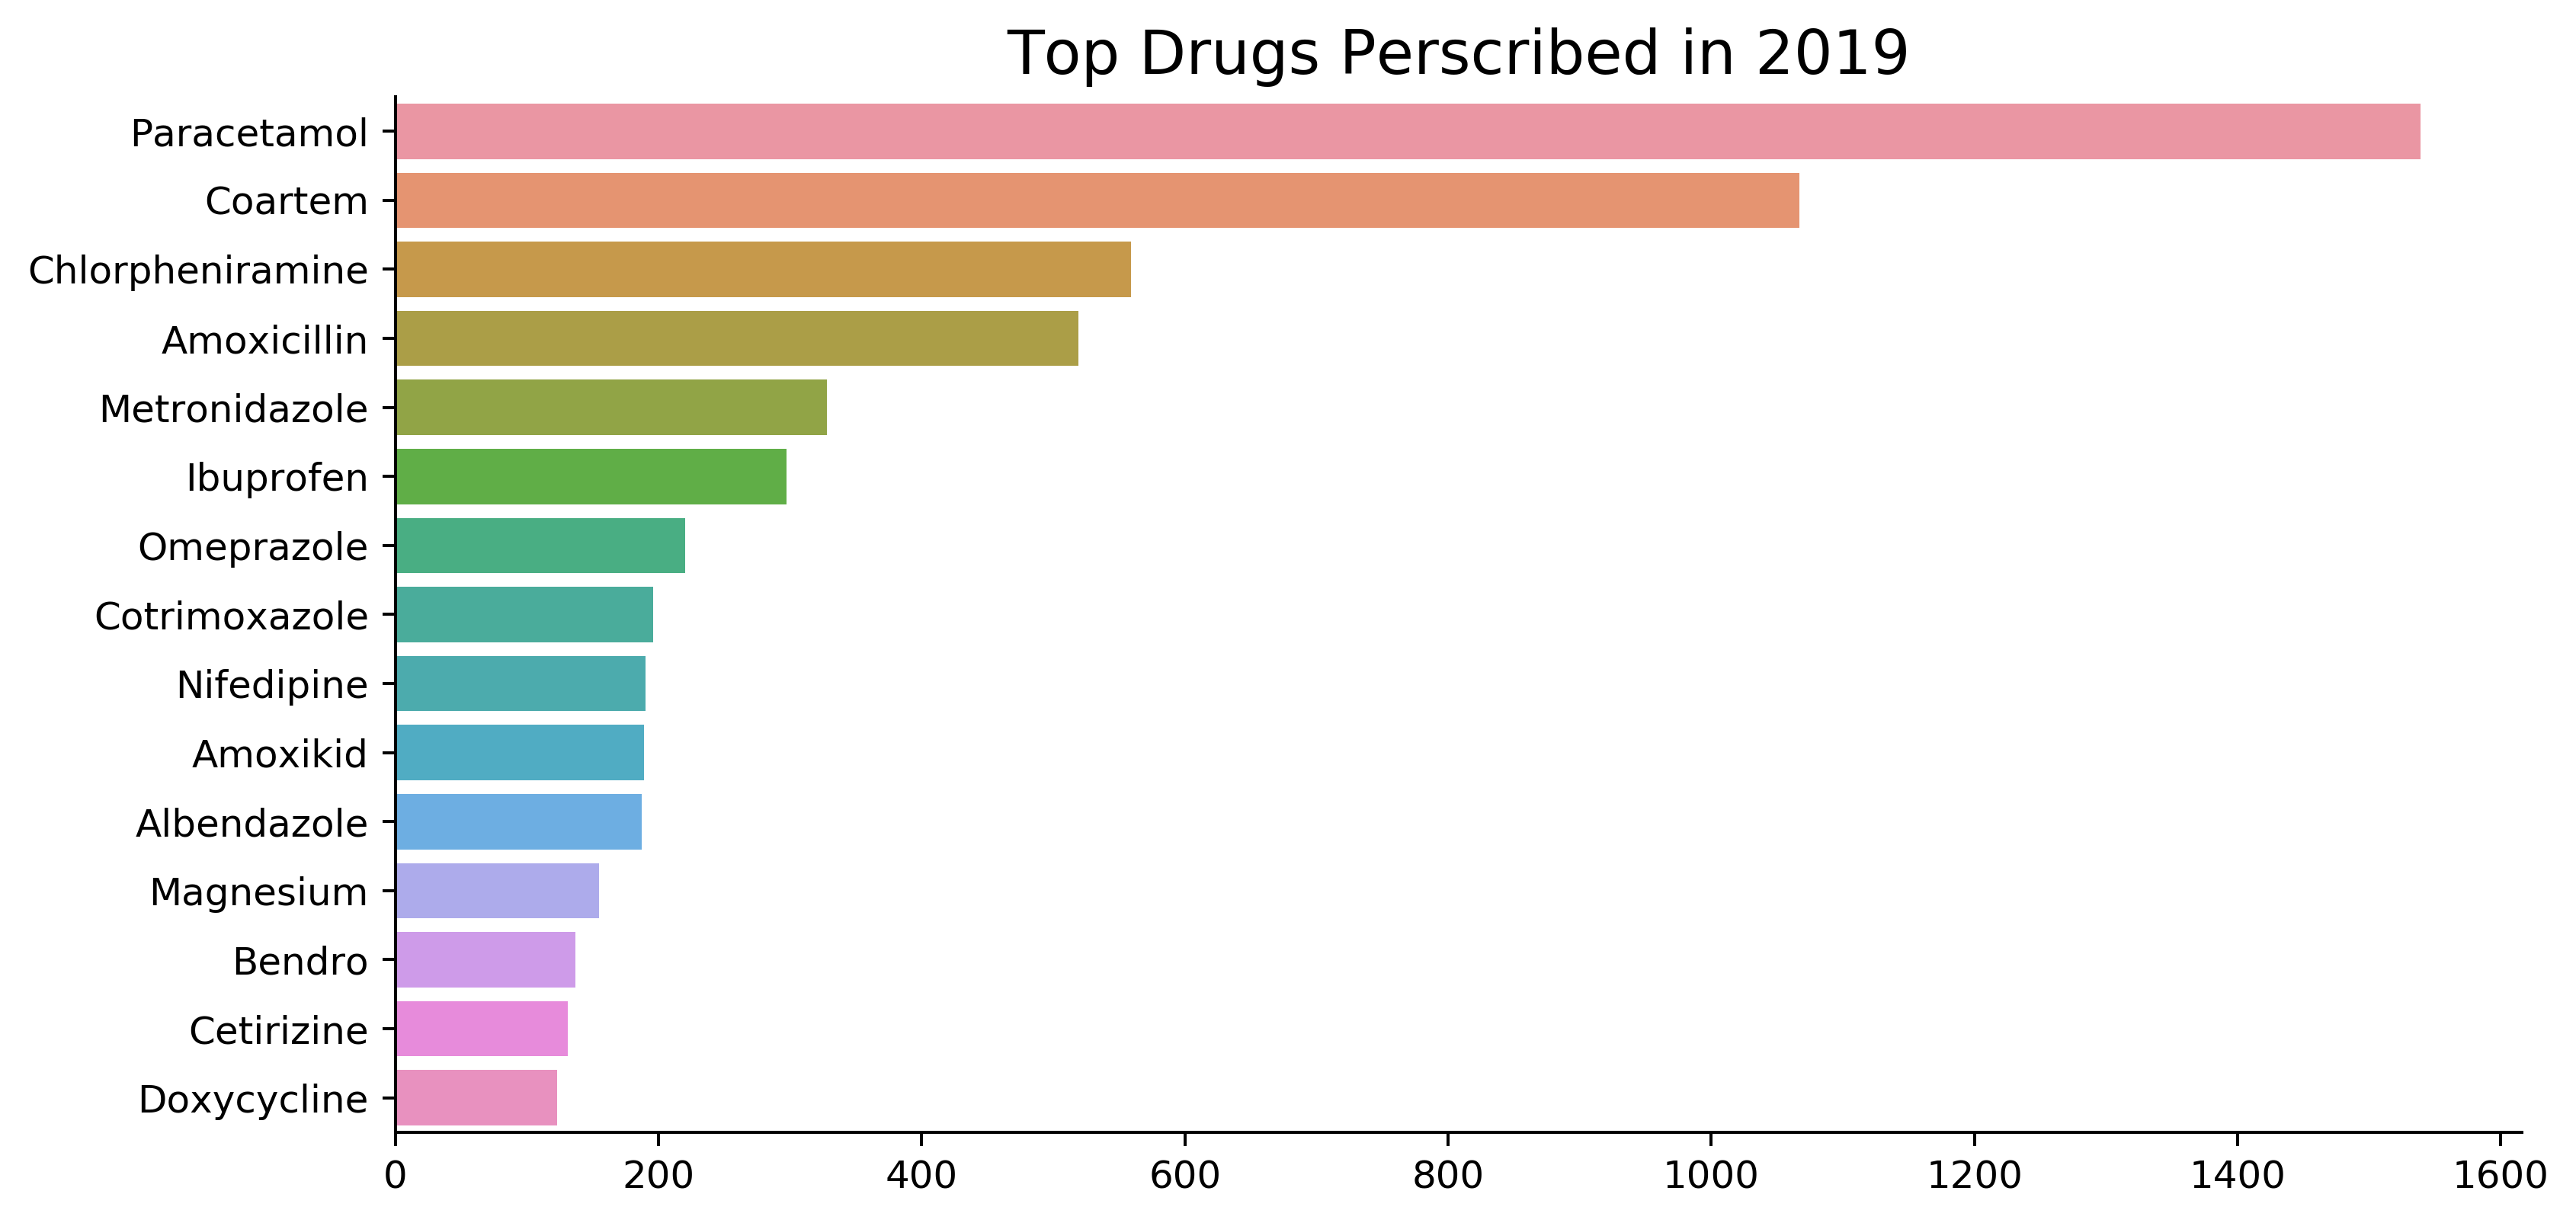

In [129]:
plt.rcParams['figure.dpi'] = 360
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(data=top_drugs, x='Values', y="Drug", ax=ax)
plt.xlabel('')
plt.ylabel('')
plt.title(('Top Drugs Perscribed in 2019'), fontsize=16)
sns.despine();
plt.show()

In [133]:
df.head()

,Year,Month_name,Month_num,Age,Age_Range,Sex,Diagnosis,Treatment,Meds,Acyclo Cream,Acyclovir,Advised,Albendazole,Amitriptyline,Amlodipine,Amoxicillin,Amoxikid,Ampiclox,Ampilox,Anusol Gel,Aprinox,Artesunate,Ascorbic Acid,Ascoril,Ascoril Syrup,Aspirin,Atenolol,Azithromycin,Bed Rest,Bendro,Bisacodyl,BP Monitoring,Caf Ear Drops,Caf Eye Drops,Calamine Lotion,Calcium,Calcium Lactate,Calcium Lactatea,Candiderm Cream,Captopril,Carbamazepine,Cardiac Asa,Catheter Removal,CBC,Cefixime,Cefiximkid,Cetamol Syrup,Cetirizine,Chlorhexidine Mouth Wash,Chlorphenamine,Chlorphenical Ear Drops,Chlorpheniramine,Cimetidine,Ciprofloxacin,Clotri Pessaries,Clotrimazole Cream,Coartem,Cocs,Cold Compress,Cotimoxkid,Cotrimoxazole,Cough Linctus,Counseling,CTX,Dexamethasone,Diazepam,Diclofenac Gel,Doxycycline,Dressing,Duocotexin,Ear Syringing,EBF,Erythromycin,F/A,Fansidar,Fefo,Ferrous Sulphate,Flucamoxkid,Fluconazole,Folic Acid,Furosemide,Glibenclamide,Glycerin Borax,Gripe Water,Griseofulvin,HCG,HCT,Hydrocortisone Cream,Ibuprofen,Ibuprokid,Indocid,Lasortern,Levofloxacin,Losarton,Magnesium,Magnesium Trisilicate,Matronidazol,Mebendazole,Medical Check Up,Medicated Soap,Mefenamic Acid,Mentronidazole,Metformin,Metronidazole,Microgynon,MultiVits,Nalidixic Acid,Nifedipine,No Meds,Nyst Pessaries,Nystakid,Nystatin Oral Suspension,ORS,Omeprazole,Paracetamol,Permethrin Cream,Phenytoin,Piritex,Piriton,Prednisolone,Probeta-N,Propranolol,Quinine,Reassurance,Rectal Diazepam,Referred,Results Given,Reythromycin,Salbutamol Inhaler,Silver Sulfadiazine,Synclav,Tapid Sponging,Teo,Tested And Results Given,Tetracycline Eye Ointment,Vendor,Vitamin A,Vitamin B6,Vitamin Bx,Vitamin C,Zinc Sulfate,Zinkid,Zycel
0,2019,January,1,0,<1,1,Diarrhoea,"Zinc Sulfate, ORS",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2019,January,1,32,25-45,0,"Pid, V.cadidiasis","Metronidazole, Doxycycline, Cefixime, Nyst Pes...",4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019,January,1,6,5-18,0,Abscess,"Azithromycin, Ibuprofen",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019,January,1,28,25-45,1,Allegic Skin Rxn,"Cetirizine, Hydrocortisone Cream",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019,January,1,45,25-45,1,Arthritis,"Paracetamol, Zycel",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## The amount of drugs received per visit, broken down by sex.

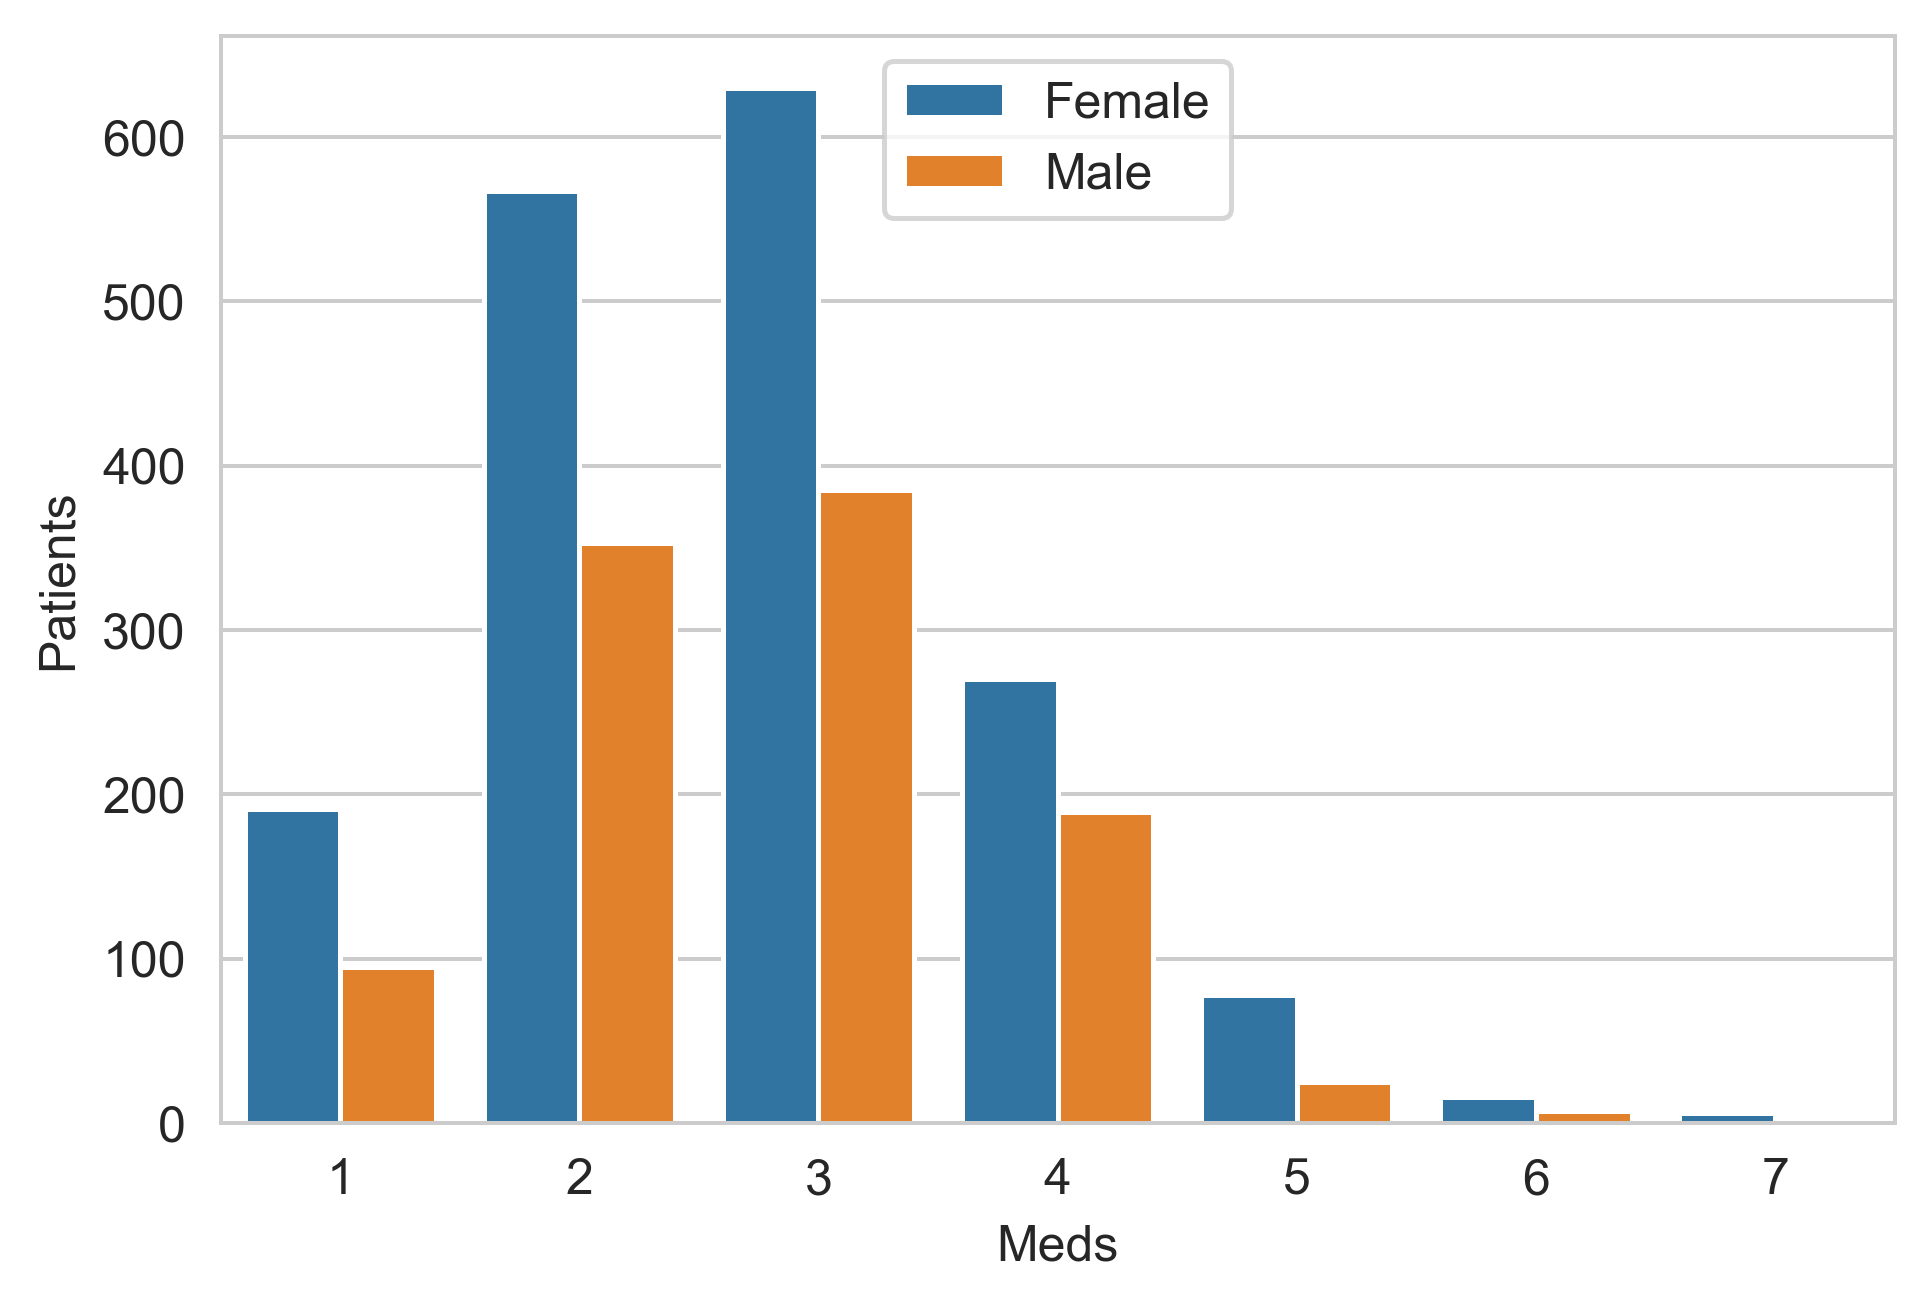

In [700]:
sns.set_style('whitegrid')
sns.countplot(x='Meds', hue='Sex', data=df)
plt.ylabel('Patients')
plt.legend(['Female', 'Male'])

## Patients seen in 2019

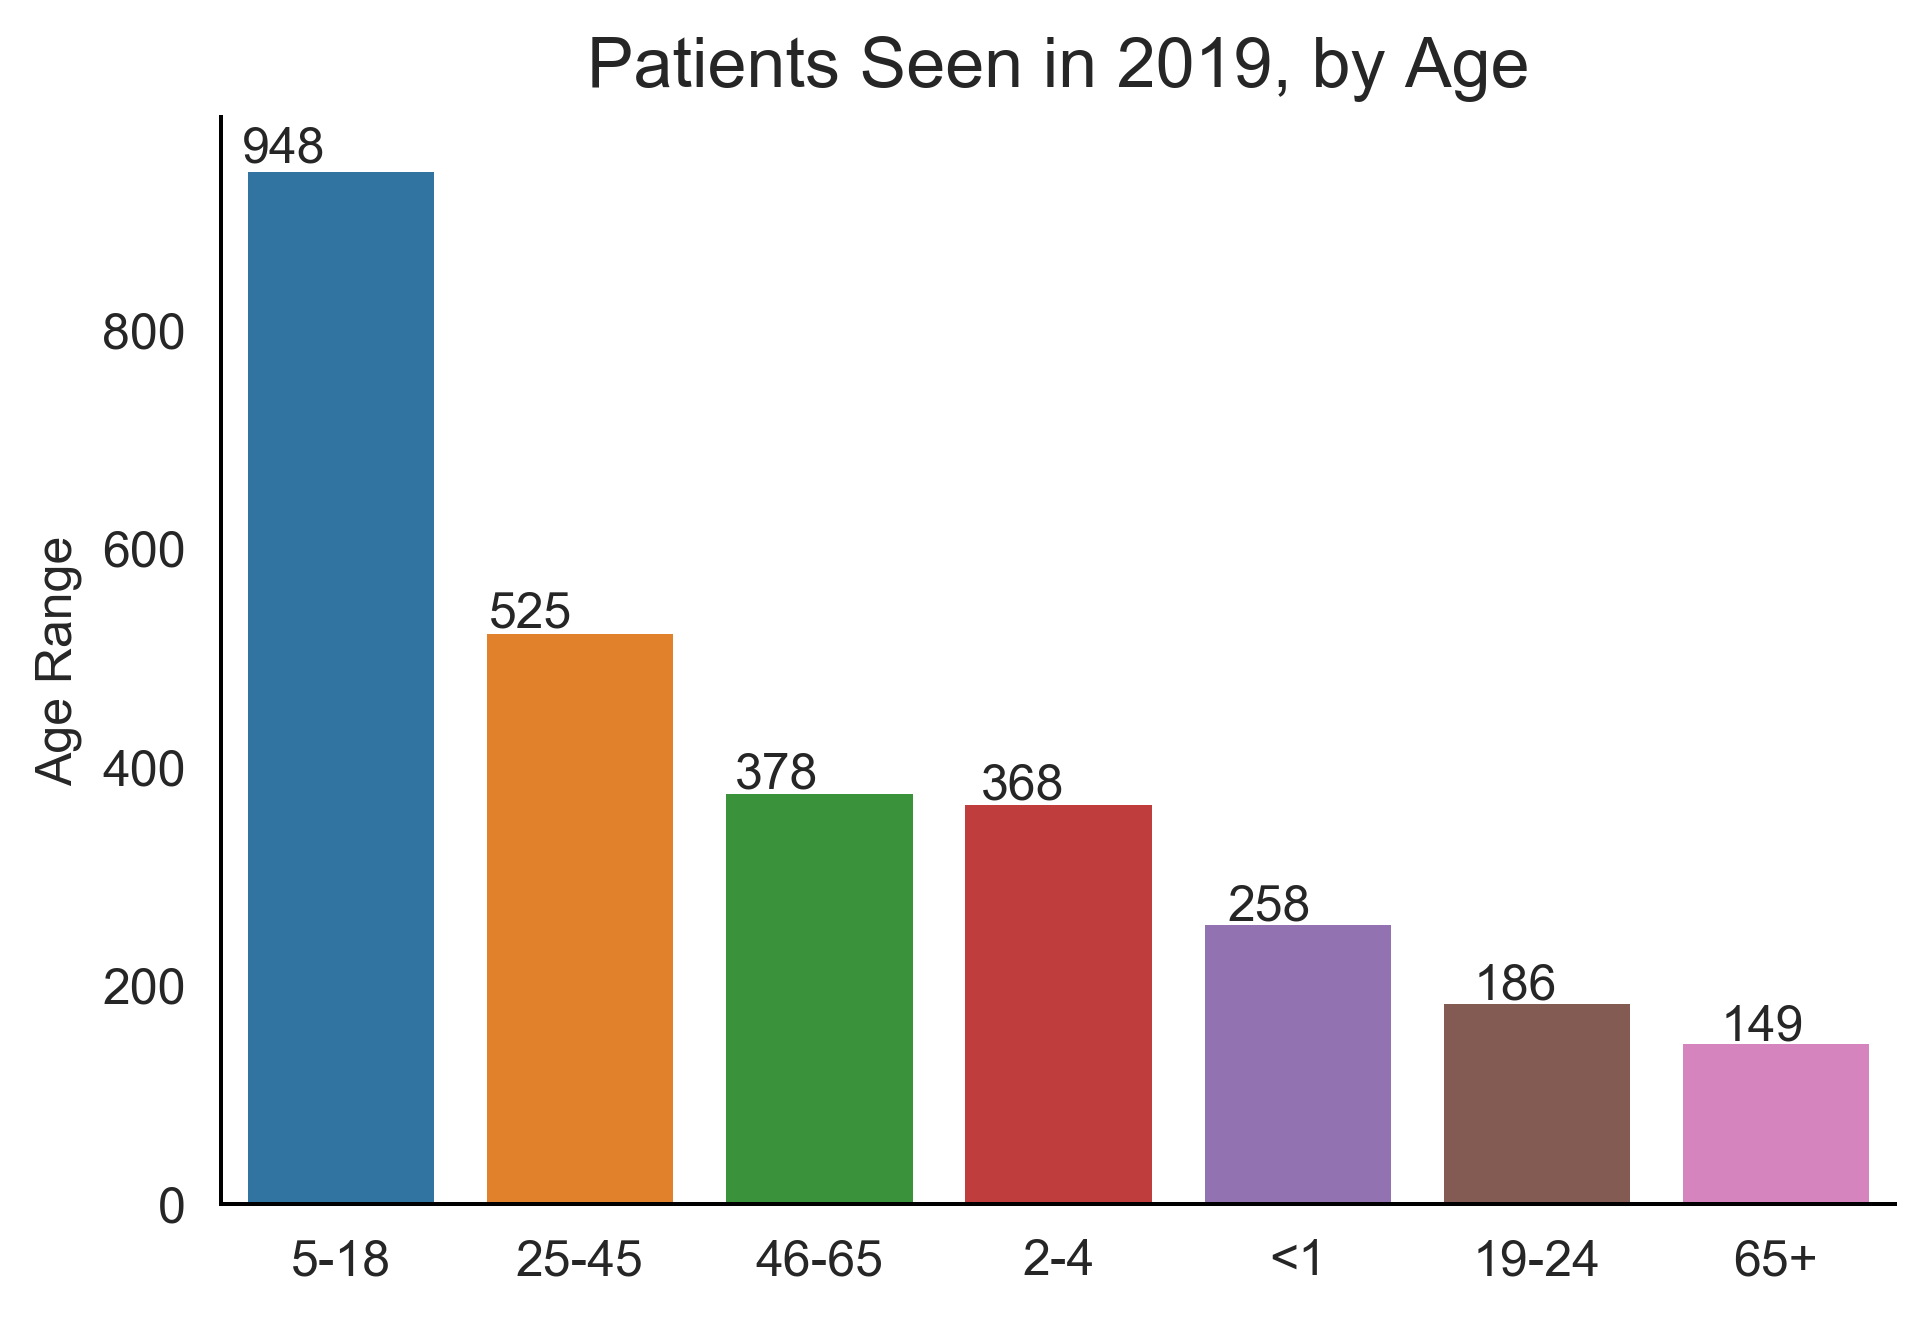

In [720]:
ax = sns.countplot(x="Age_Range", data=df, order = df['Age_Range'].value_counts().index)
plt.title(('Patients Seen in 2019, by Age'), fontsize=14)
ax.grid(False)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.03, p.get_height() * 1.006))
plt.rc_context({'axes.edgecolor':'black'})
plt.xlabel('')
plt.ylabel('Age Range')
sns.despine();
plt.show()

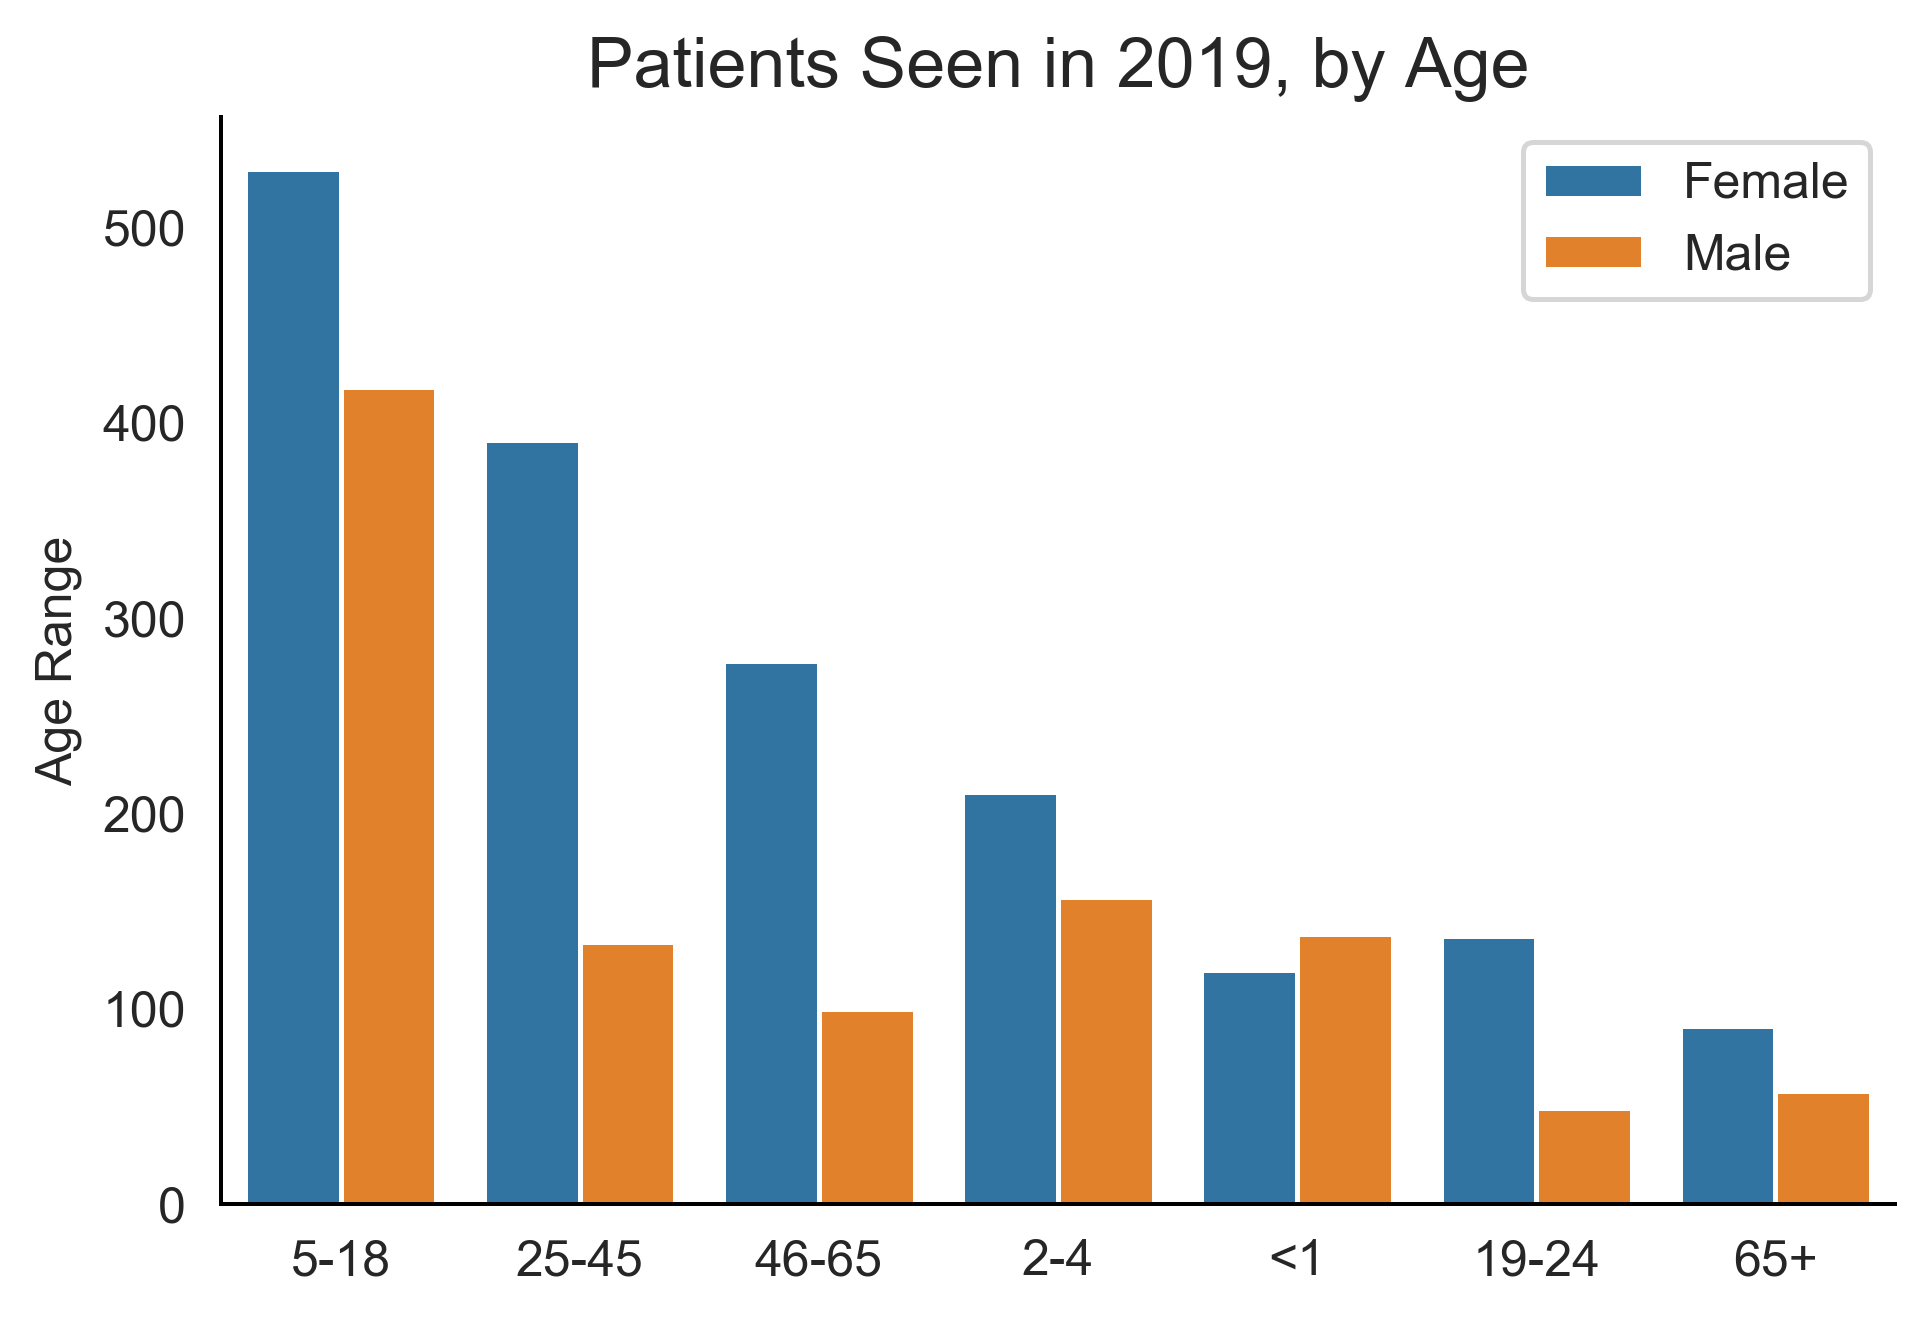

In [703]:
ax = sns.countplot(x="Age_Range", hue='Sex', data=df, order = df['Age_Range'].value_counts().index)
plt.title(('Patients Seen in 2019, by Age'), fontsize=14)
ax.grid(False)
plt.rc_context({'axes.edgecolor':'black'})
plt.xlabel('')
plt.ylabel('Age Range')
ax.legend(['Female','Male'])
sns.despine();
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22f4a110>]],
      dtype=object)

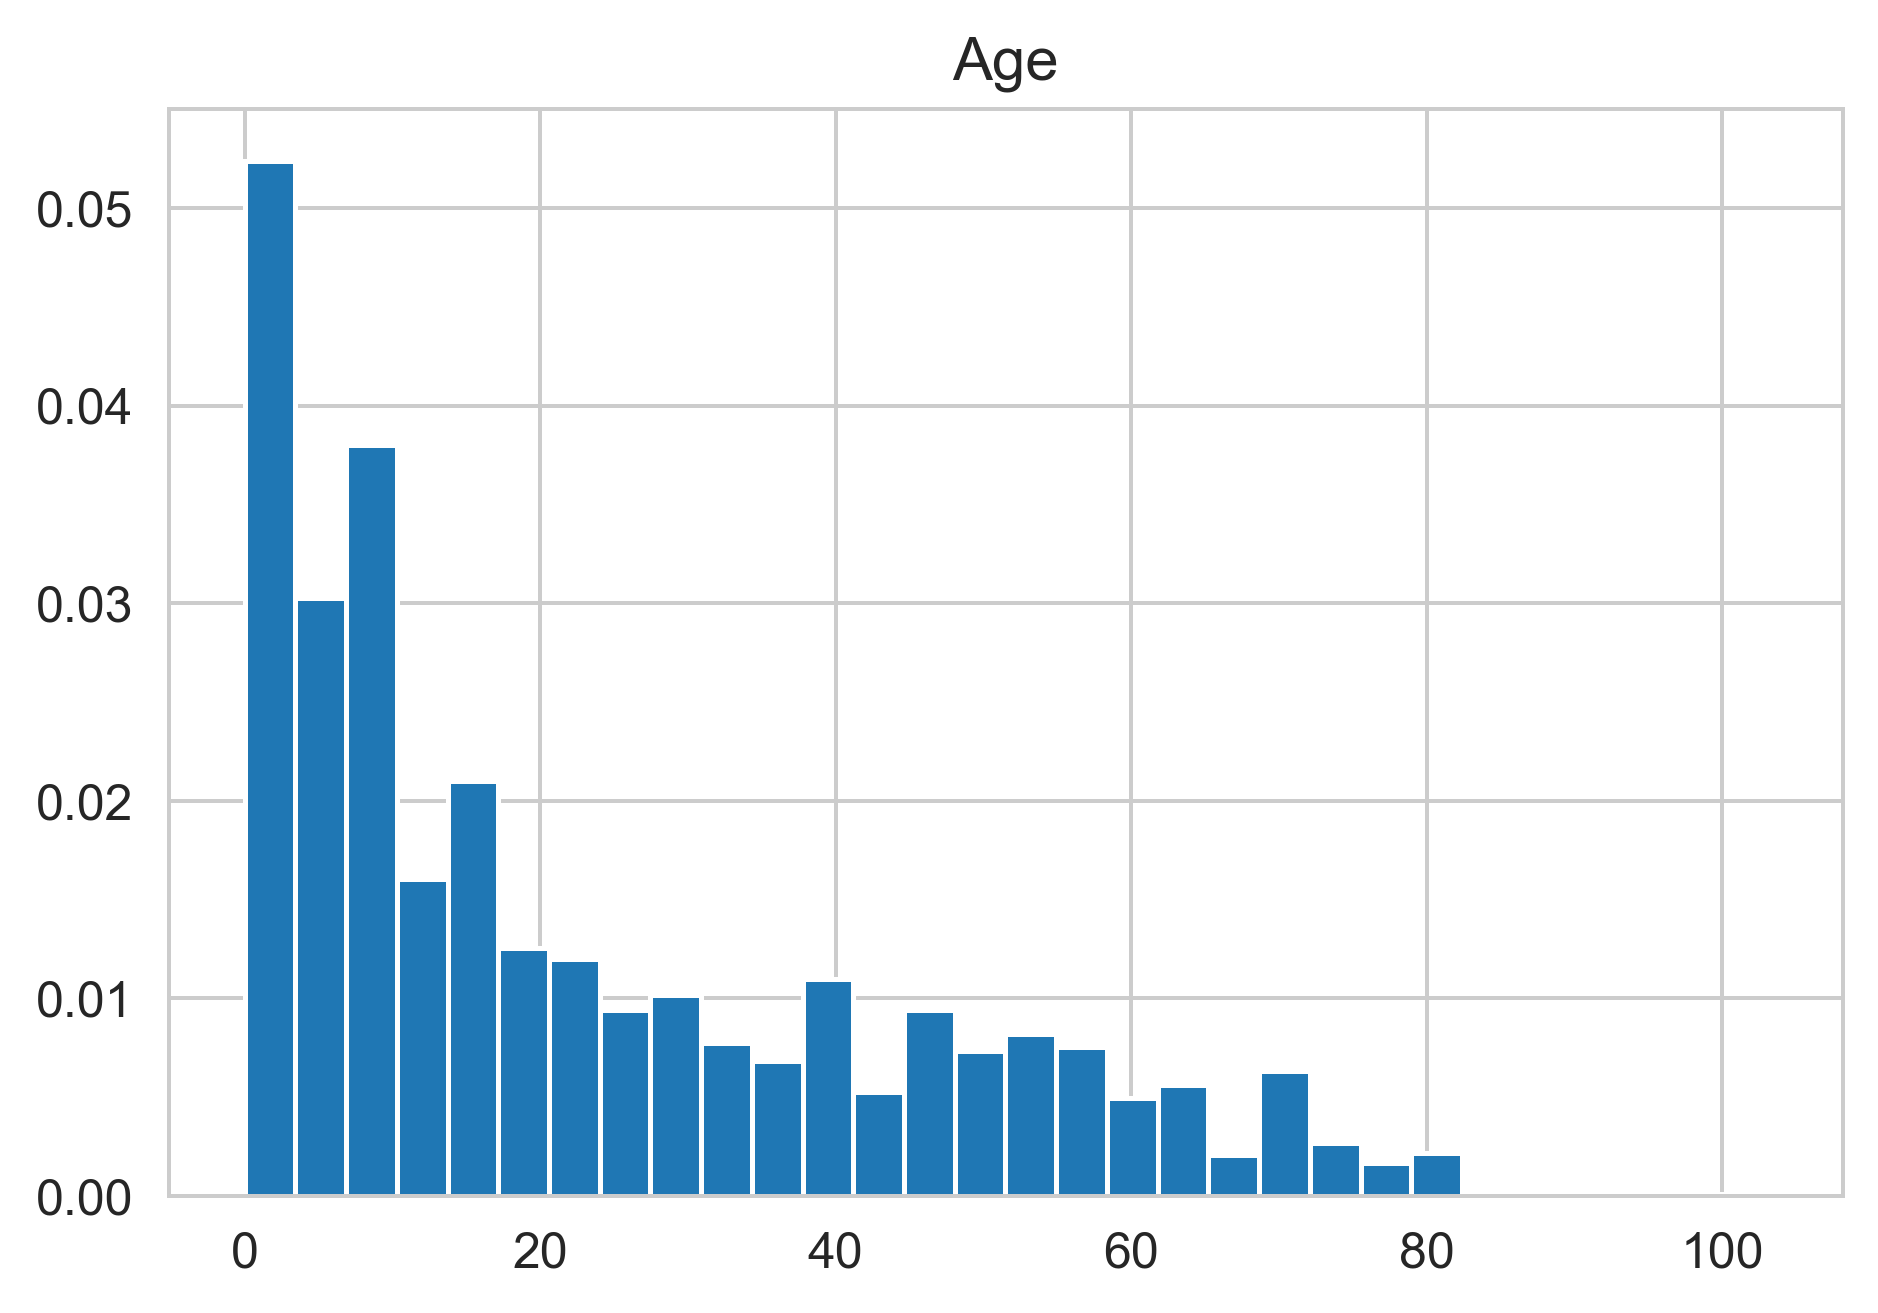

In [610]:
#plt.hist(df['Age'], density=True, bins=30)
df.hist('Age', density=True, bins=30)

In [347]:
df_2.head()

,fullName,Month_num,Month_name,drugName,qty_supplied,Ug_Price,US_Price,Unit_Pack,UG_PPM,US_PPM,UG_PPP,US_PPP,prescribedByName
0,Maurencia Nakabugo,1.0,January,Albendazole,7.0,10200.0,2.76,100.0,102.00,0.028,714.00,0.20,Sarah
1,Ramathan Kivumbi,1.0,January,Albendazole,17.0,10200.0,2.76,100.0,102.00,0.028,1734.00,0.48,Jimmy
2,Catherine Namboze,1.0,January,Amitriptyline,113.0,4343.0,1.17,100.0,43.43,0.012,4907.59,1.36,Sarah
3,Abdala Haman Sonko,1.0,January,Amoxicillin,22.0,6000.0,1.62,100.0,60.00,0.016,1320.00,0.35,Jimmy
4,Alex Kafula,1.0,January,Amoxicillin,120.0,6000.0,1.62,100.0,60.00,0.016,7200.00,1.92,Jimmy


# Patients seen in 2020

In [348]:
df_2.Month_name.value_counts()

January     209
July        177
June        176
February    168
August      145
March       120
May         109
April        87
Name: Month_name, dtype: int64

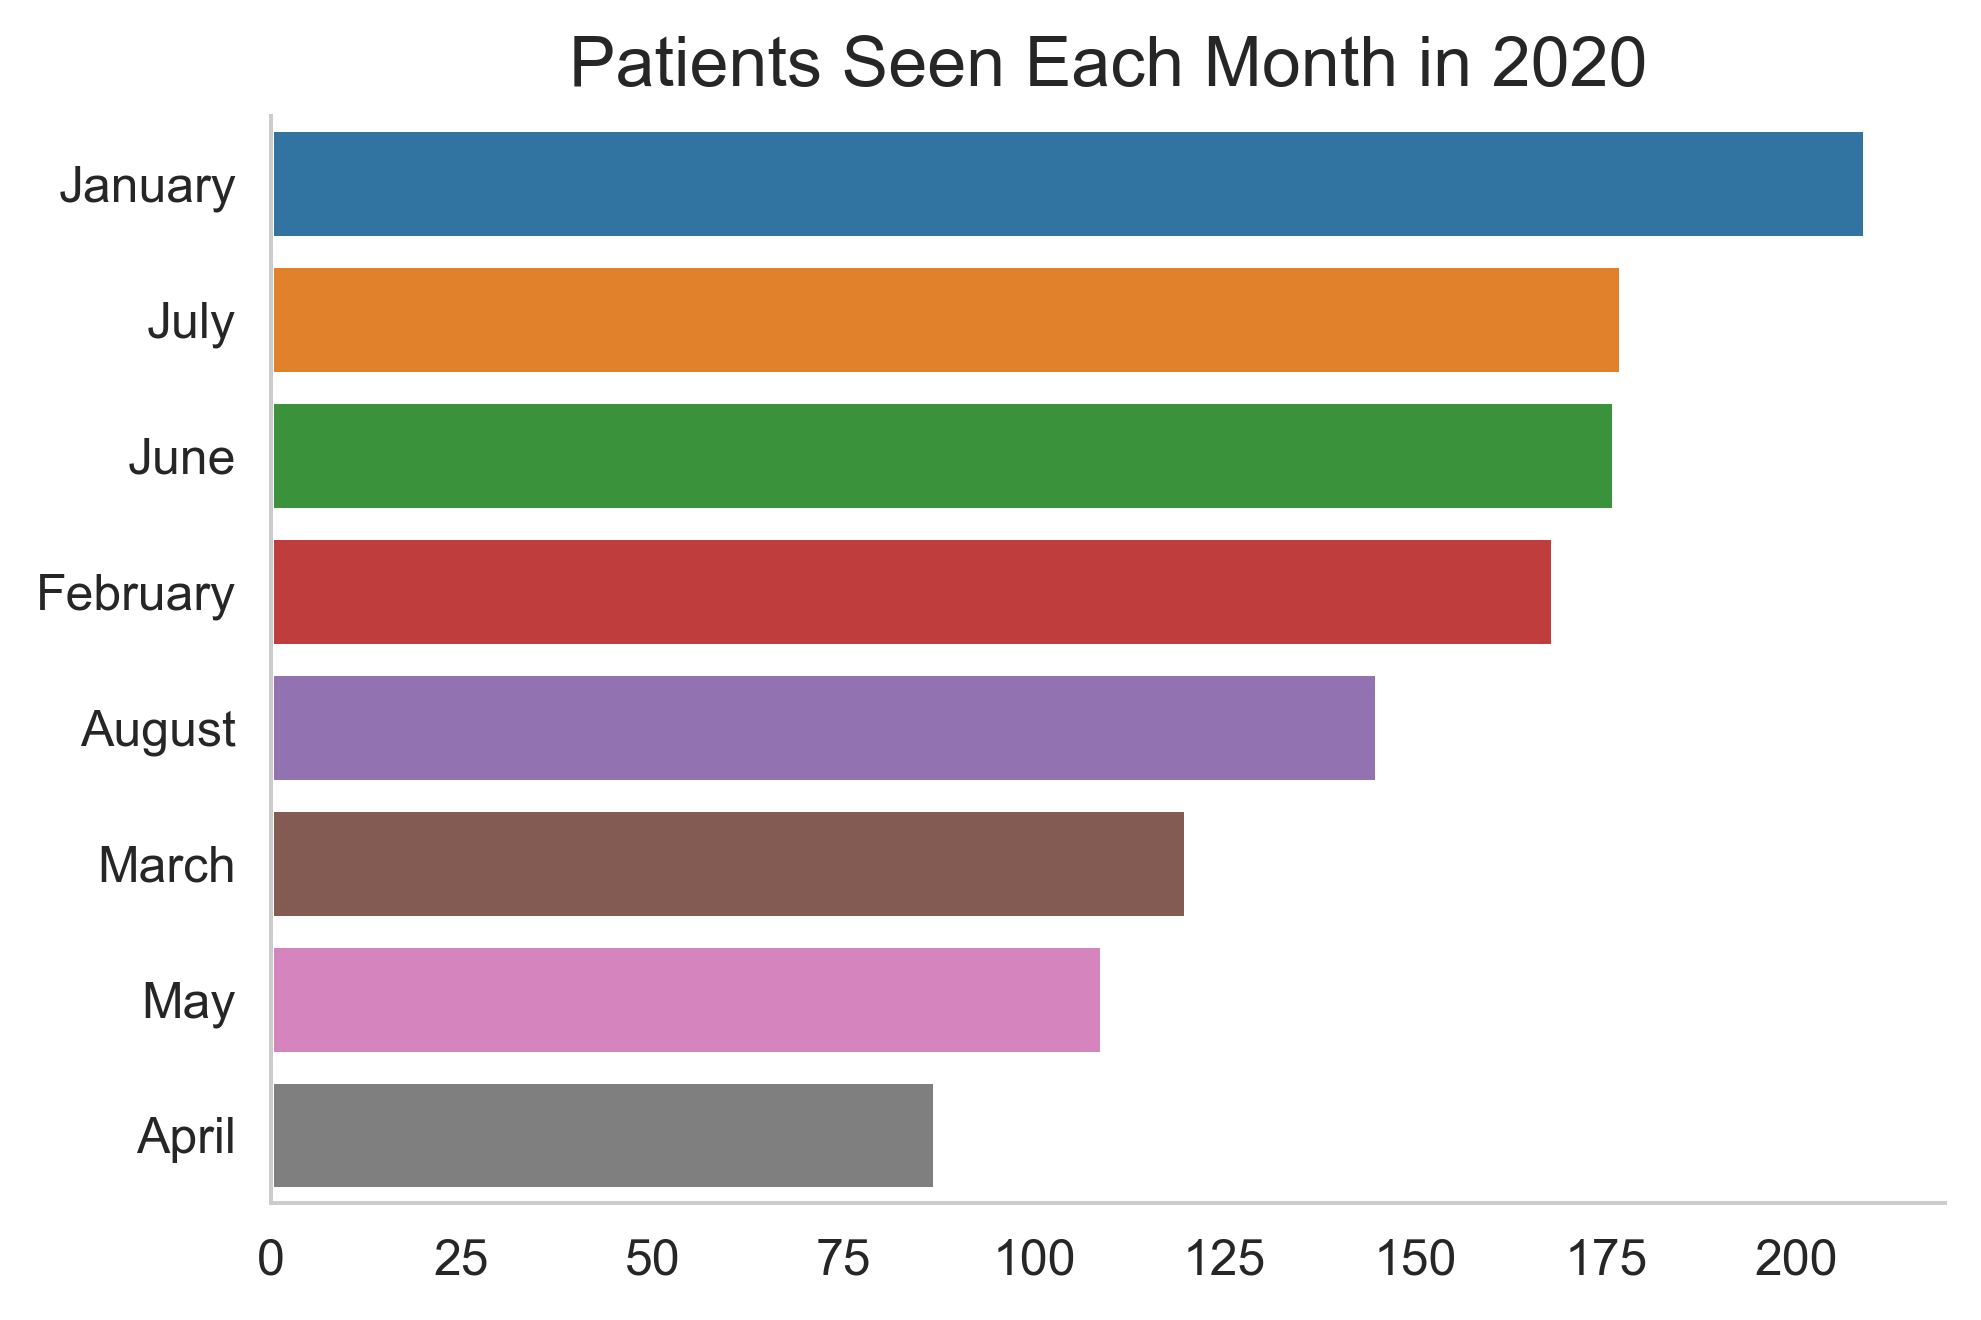

In [643]:
ax = sns.countplot(y="Month_name", data=df_2, order = df_2['Month_name'].value_counts().index)
plt.title(('Patients Seen Each Month in 2020'), fontsize=14)
ax.grid(False)
plt.rc_context({'axes.edgecolor':'black'})
plt.xlabel('')
plt.ylabel('')
sns.despine();
plt.show()

In [690]:
Mon_19 = df.Month_num.value_counts()
Mon_19.sort_index(inplace=True)
Mon_19.drop(Mon_19.index[[-1,-2,-3]], inplace =True)
Mon_19 = pd.DataFrame(Mon_19)
Mon_19

,Month_num
1,313
2,122
3,128
4,144
5,457
6,318
7,480
8,332


In [689]:
Mon_20 = df_2.Month_num.value_counts()
Mon_20.sort_index(inplace=True)
Mon_20 = pd.DataFrame(Mon_20)
Mon_Lab = Mon_20
Mon_Lab['Month'] = Mon_20.index
Mon_Lab

,Month_num,Month
1,209,1
2,168,2
3,120,3
4,87,4
5,109,5
6,176,6
7,177,7
8,145,8


## Comparing Patients seen for 2019 & 2020

<function matplotlib.pyplot.show(*args, **kw)>

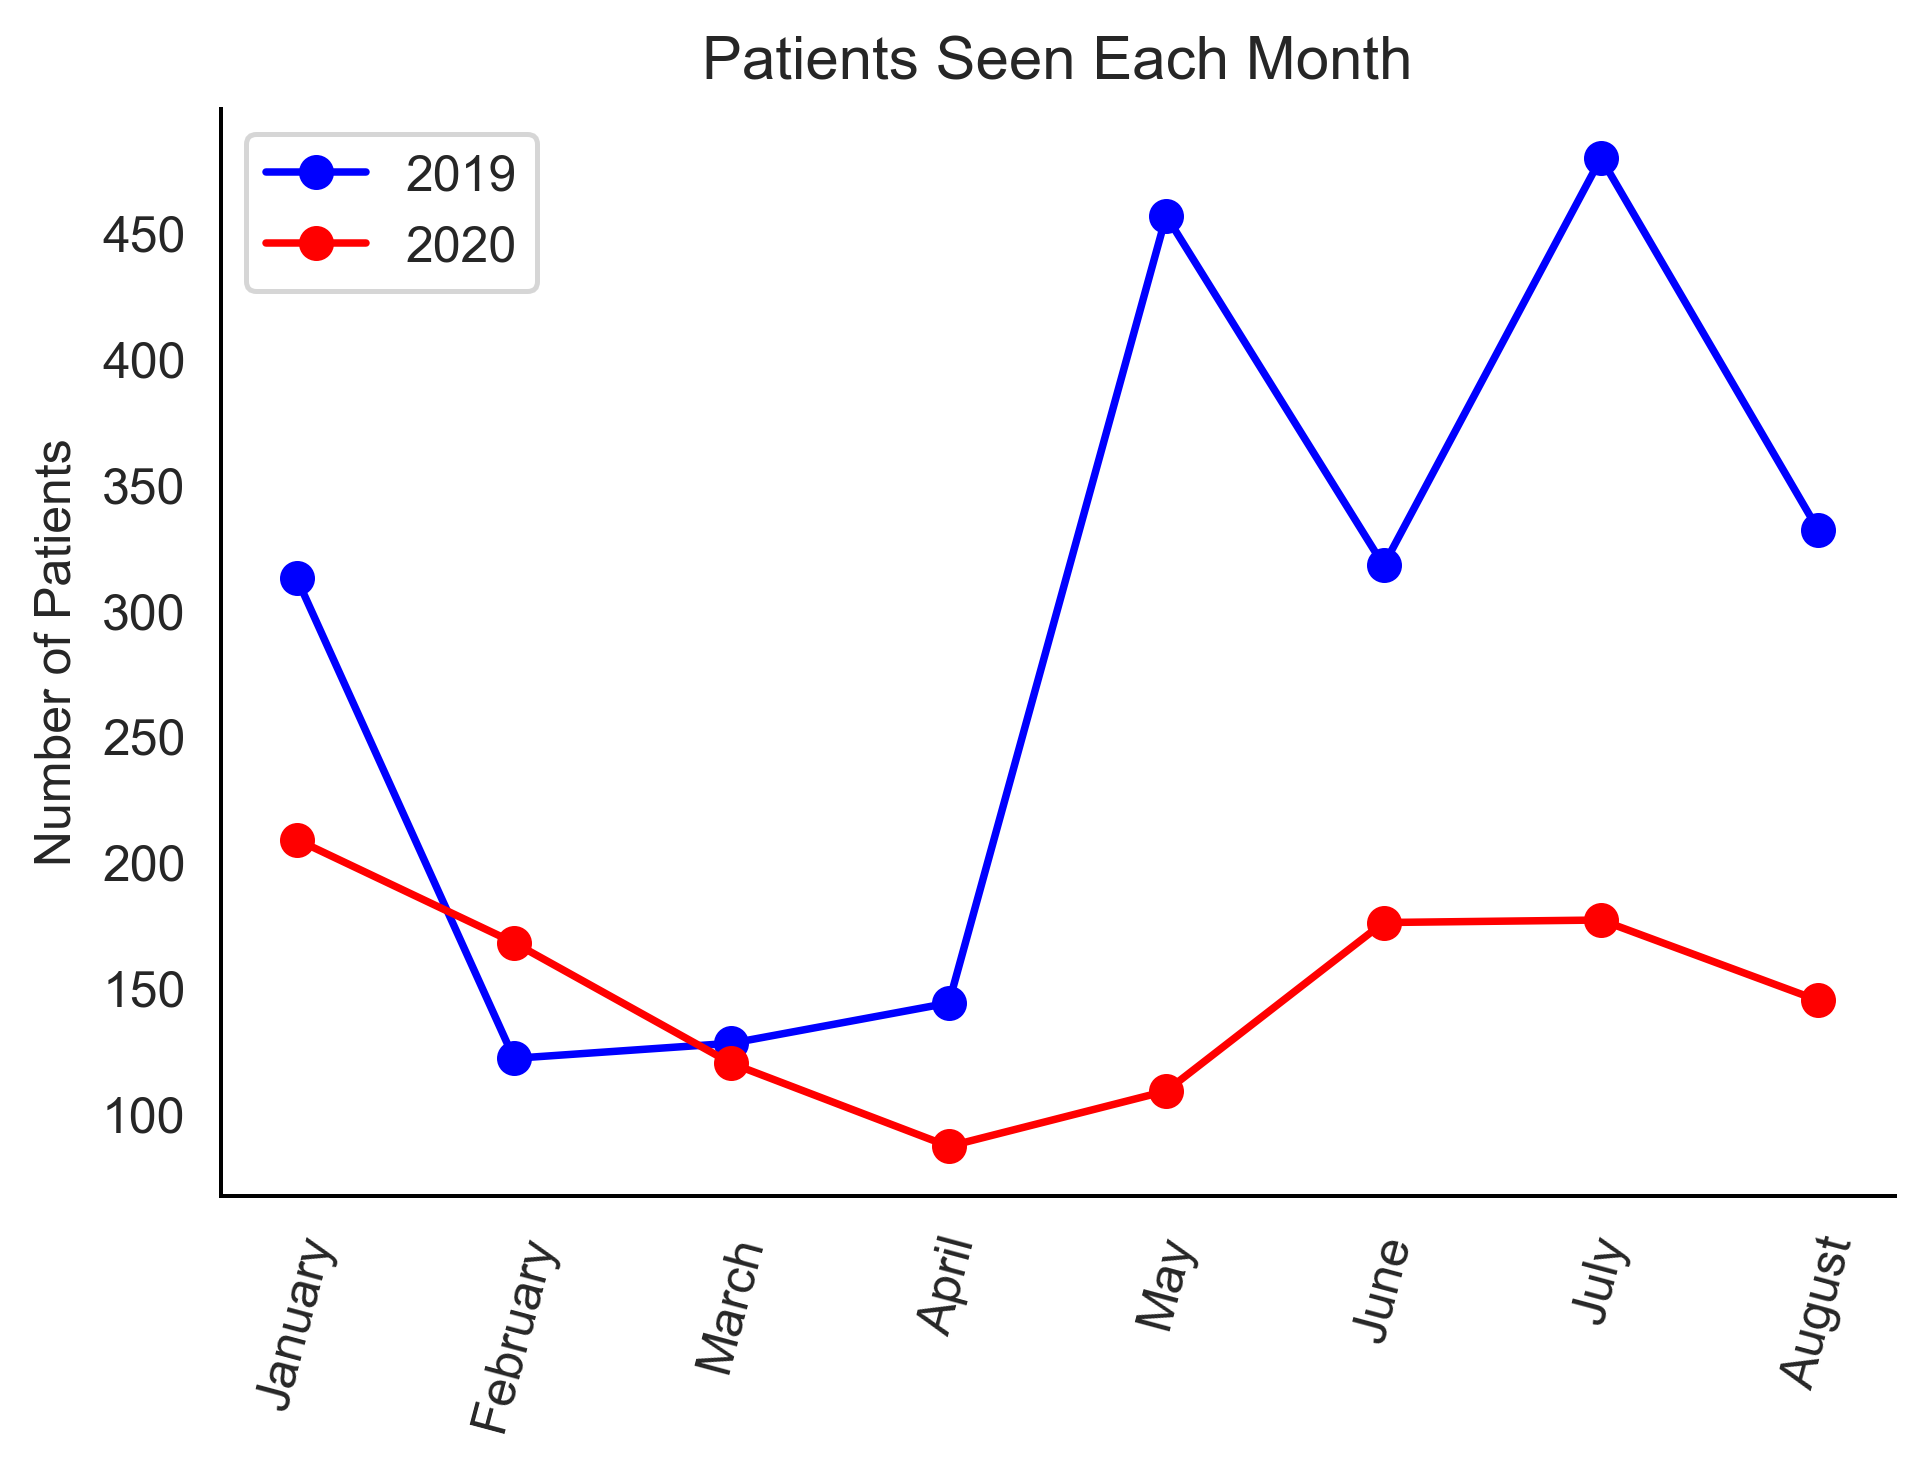

In [722]:
y = np.array(Mon_Lab['Month'])
x = np.array(Mon_19['Month_num'])
z = np.array(Mon_Lab['Month_num'])

# plt.plot(y, x, z, marker='o')
plt.plot(y, x, "blue", label="2019", marker="o")
plt.plot(y, z, "red", label="2020", marker="o")
plt.xticks([1,2,3,4,5,6,7,8], ['January','February','March','April','May','June','July','August'], rotation=75)
plt.grid(False)
sns.despine();
plt.legend(loc="upper left")
plt.title(('Patients Seen Each Month'), fontsize=12)
plt.ylabel('Number of Patients')
plt.show

## Patients seen in 2019

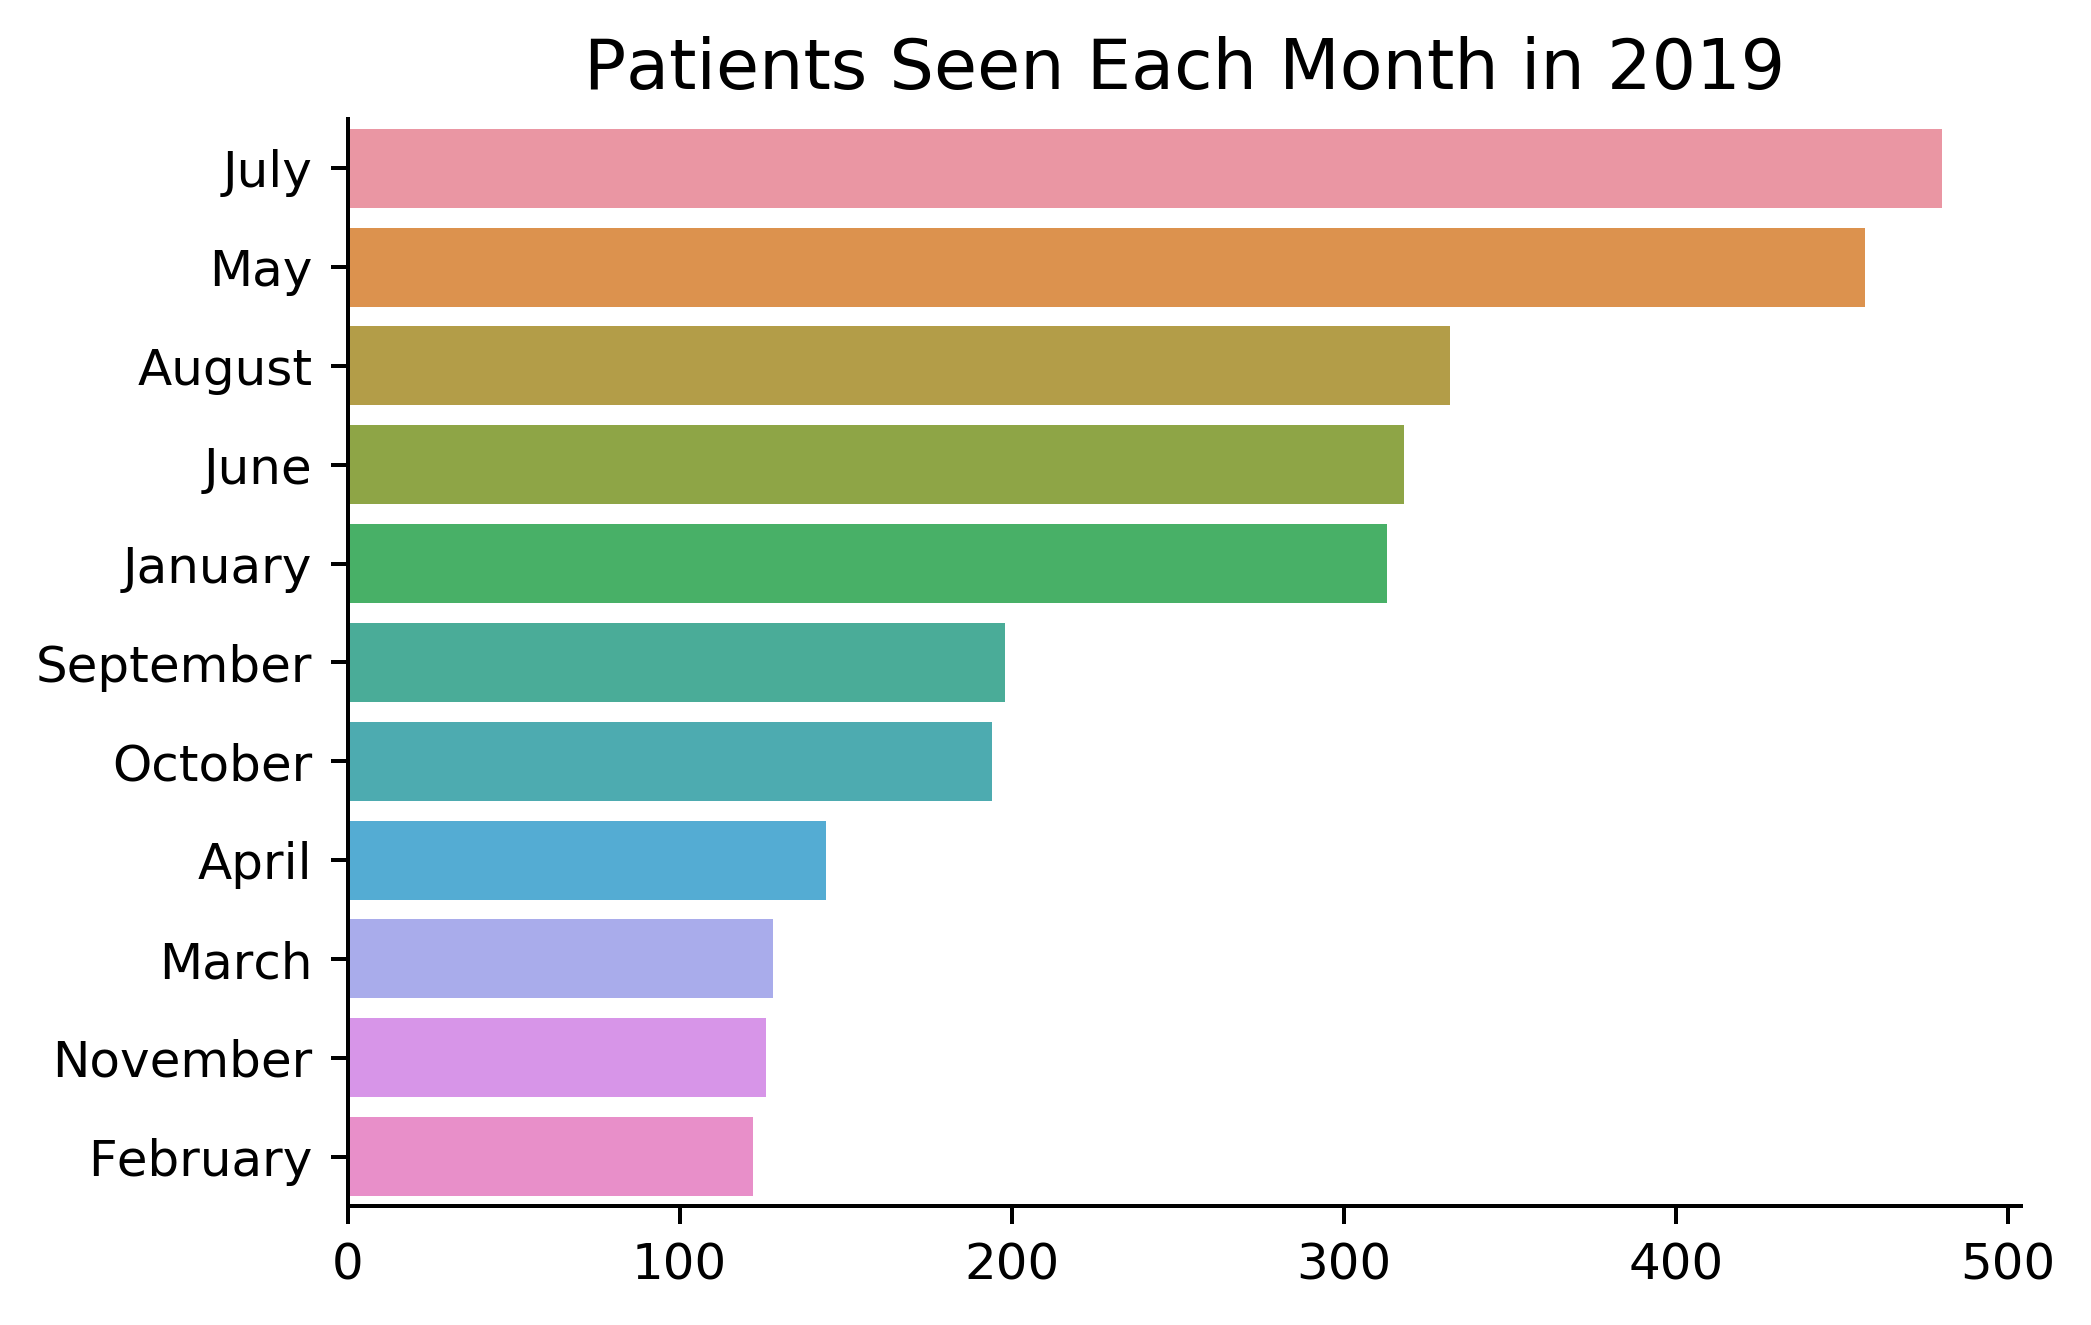

In [349]:
ax = sns.countplot(y="Month_name", data=df, order = df['Month_name'].value_counts().index)
plt.title(('Patients Seen Each Month in 2019'), fontsize=14)
ax.grid(False)
plt.rc_context({'axes.edgecolor':'black'})
plt.xlabel('')
plt.ylabel('')
sns.despine();
plt.show()

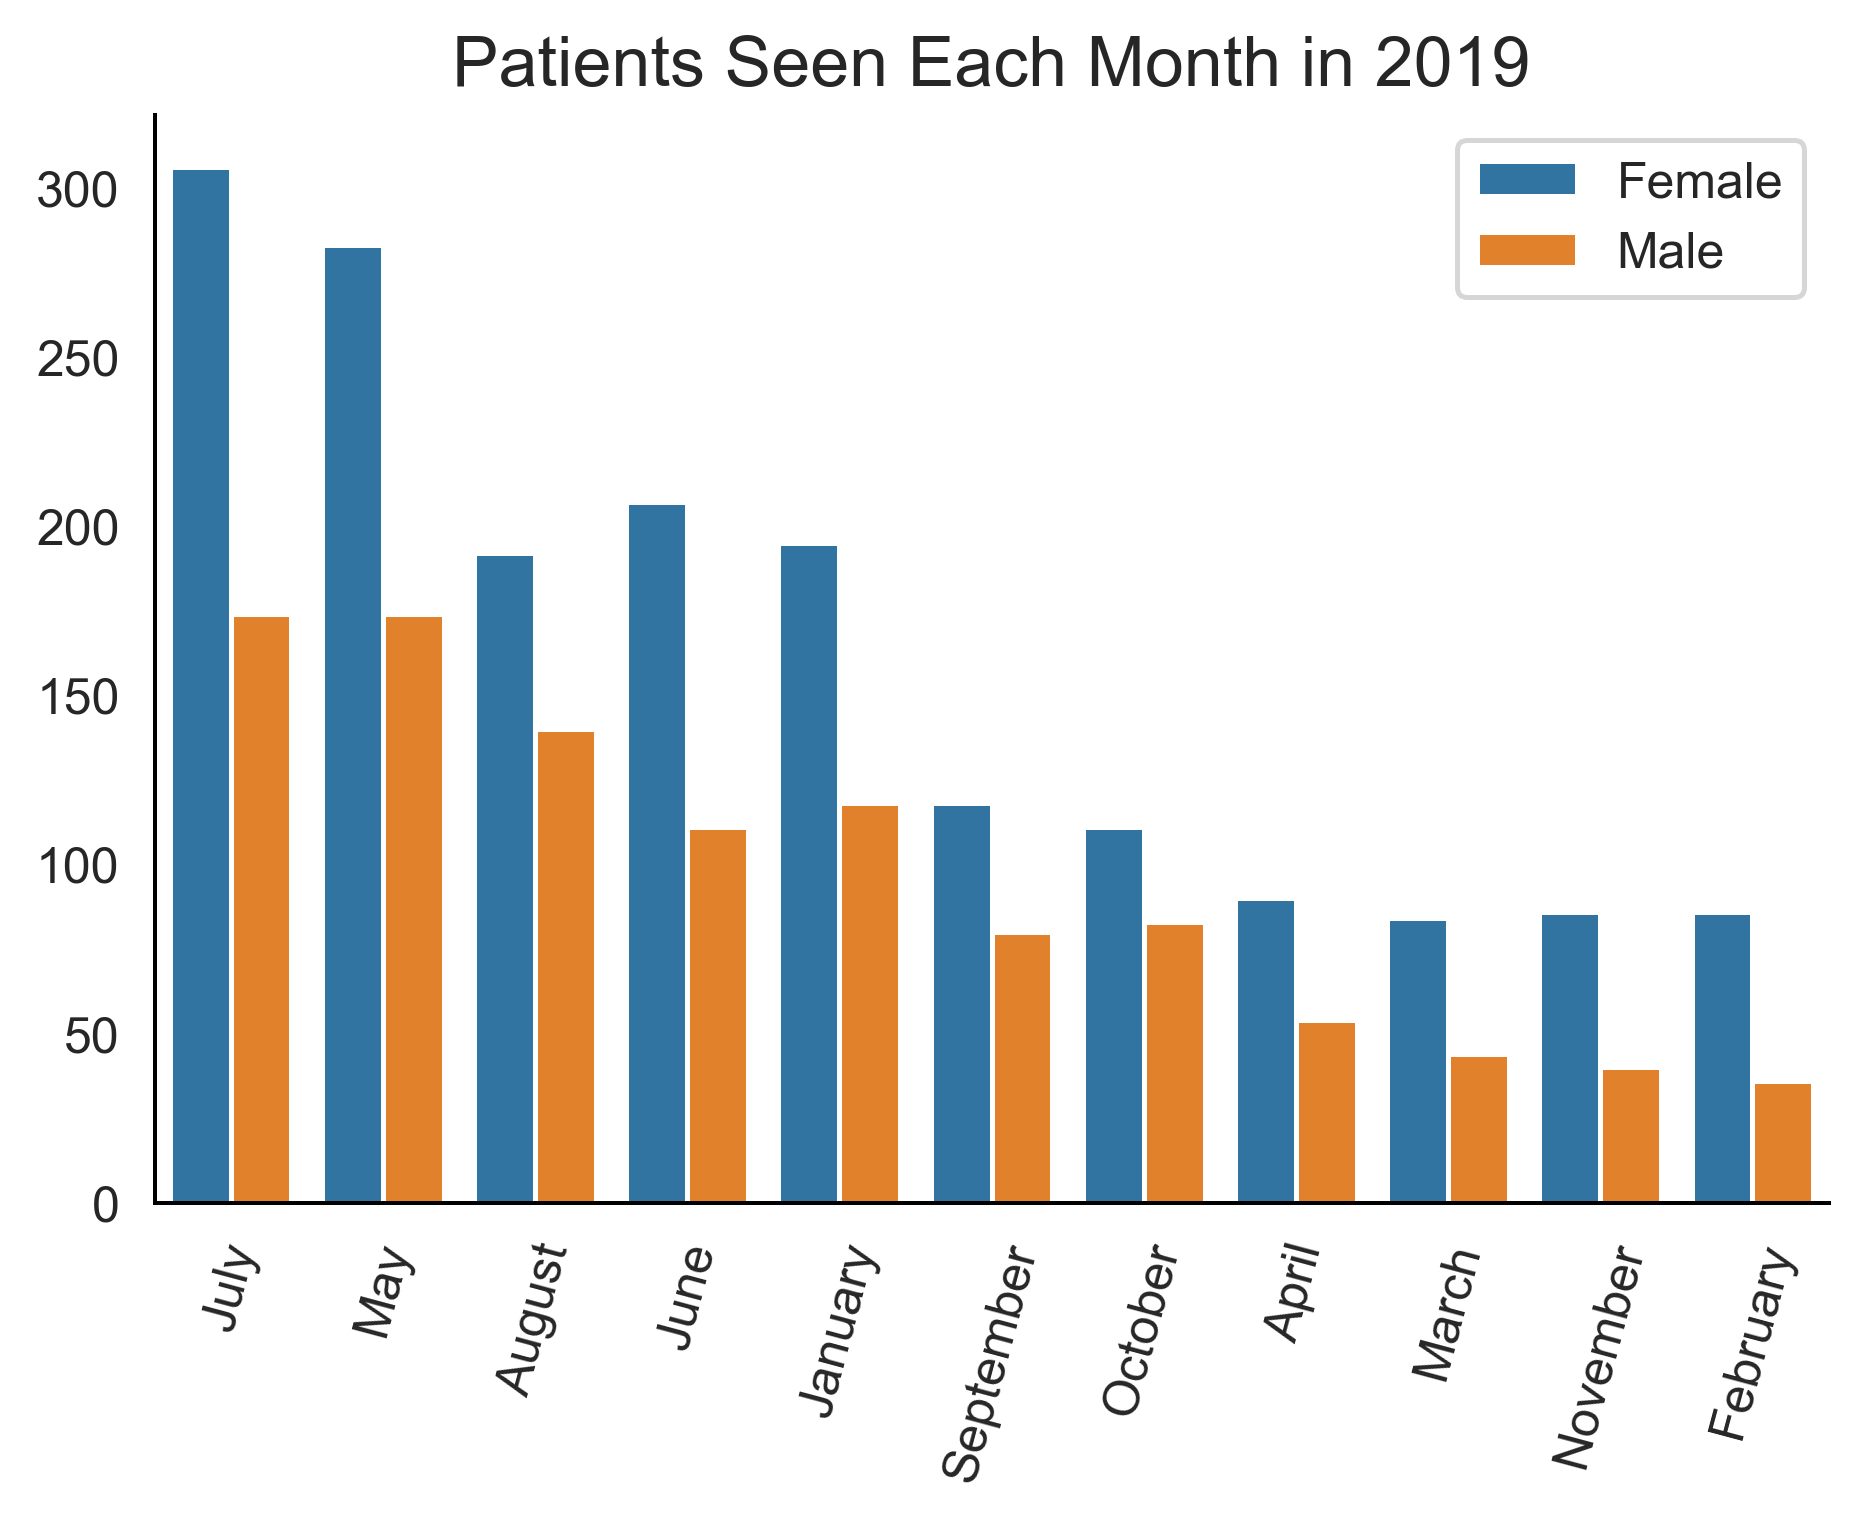

In [738]:
ax = sns.countplot(x="Month_name", data=df, hue='Sex', order = df['Month_name'].value_counts().index)
plt.title(('Patients Seen Each Month in 2019'), fontsize=14)
ax.grid(False)
plt.rc_context({'axes.edgecolor':'black'})
plt.xticks(rotation=75)
ax.legend(['Female','Male'])
plt.xlabel('')
plt.ylabel('')
sns.despine();
plt.show()

In [ ]:
# July is the coldest month in Uganda, with an average low-temperature of 62.8°F(17.1°C).
# May is the last month of spring and wet season. It is also the most humid month, which can lead to an increase in
    # mosquitoes. Mosquitoes love moisture and humidity and can seem even more aggressive after a storm. - ORTHO WEBSITE

In [151]:
df.loc[df['Month_name'].isin(['July'])]

,Year,Month_name,Month_num,Age,Age_Range,Sex,Diagnosis,Treatment,Meds,Acyclo Cream,Acyclovir,Advised,Albendazole,Amitriptyline,Amlodipine,Amoxicillin,Amoxikid,Ampiclox,Ampilox,Anusol Gel,Aprinox,Artesunate,Ascorbic Acid,Ascoril,Ascoril Syrup,Aspirin,Atenolol,Azithromycin,Bed Rest,Bendro,Bisacodyl,BP Monitoring,Caf Ear Drops,Caf Eye Drops,Calamine Lotion,Calcium,Calcium Lactate,Calcium Lactatea,Candiderm Cream,Captopril,Carbamazepine,Cardiac Asa,Catheter Removal,CBC,Cefixime,Cefiximkid,Cetamol Syrup,Cetirizine,Chlorhexidine Mouth Wash,Chlorphenamine,Chlorphenical Ear Drops,Chlorpheniramine,Cimetidine,Ciprofloxacin,Clotri Pessaries,Clotrimazole Cream,Coartem,Cocs,Cold Compress,Cotimoxkid,Cotrimoxazole,Cough Linctus,Counseling,CTX,Dexamethasone,Diazepam,Diclofenac Gel,Doxycycline,Dressing,Duocotexin,Ear Syringing,EBF,Erythromycin,F/A,Fansidar,Fefo,Ferrous Sulphate,Flucamoxkid,Fluconazole,Folic Acid,Furosemide,Glibenclamide,Glycerin Borax,Gripe Water,Griseofulvin,HCG,HCT,Hydrocortisone Cream,Ibuprofen,Ibuprokid,Indocid,Lasortern,Levofloxacin,Losarton,Magnesium,Magnesium Trisilicate,Matronidazol,Mebendazole,Medical Check Up,Medicated Soap,Mefenamic Acid,Mentronidazole,Metformin,Metronidazole,Microgynon,MultiVits,Nalidixic Acid,Nifedipine,No Meds,Nyst Pessaries,Nystakid,Nystatin Oral Suspension,ORS,Omeprazole,Paracetamol,Permethrin Cream,Phenytoin,Piritex,Piriton,Prednisolone,Probeta-N,Propranolol,Quinine,Reassurance,Rectal Diazepam,Referred,Results Given,Reythromycin,Salbutamol Inhaler,Silver Sulfadiazine,Synclav,Tapid Sponging,Teo,Tested And Results Given,Tetracycline Eye Ointment,Vendor,Vitamin A,Vitamin B6,Vitamin Bx,Vitamin C,Zinc Sulfate,Zinkid,Zycel
1482,2019,July,7,18,5-18,0,Allergic Conjuctivitis,Probeta-N,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1483,2019,July,7,50,46-65,0,Allergic Conjuctivitis,"Paracetamol, Probeta-N",2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1484,2019,July,7,57,46-65,1,"Arthritis, PUD,HTN","Nifedipine, Amitriptyline, Magnesium, Zycel",4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1485,2019,July,7,38,25-45,0,Arthritis,"Zycel, Amitriptyline, Ibuprofen",3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1486,2019,July,7,98,65+,0,"Arthritis, Dental carries","Metronidazole, Paracetamol, Calcium Lactate",4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Patients seen each month in 2019 by sex

In [231]:
test = df.loc[df['Sex'].isin(['0'])]
test_2 = df.loc[df['Sex'].isin(['1'])]
gender = test.Month_num.value_counts().sort_index()
gender_f = pd.DataFrame(gender)
gender_f.rename(columns={'Month_num' :'Female'}, inplace=True)
gender_f['Month'] = gender_f.index
gender_f.Month.replace([1,2,3,4,5,6,7,8,9,10,11], ['January','February','March','April','May','June','July','August',
                                                  'September','October','November'], inplace=True)

gender_m = test_2.Month_num.value_counts().sort_index()
gender_m = pd.DataFrame(gender_m)
gender_m.rename(columns={'Month_num' :'Male'}, inplace=True)
gender_m['Month'] = gender_m.index
gender_m.Month.replace([1,2,3,4,5,6,7,8,9,10,11], ['January','February','March','April','May','June','July','August',
                                                  'September','October','November'], inplace=True)


gender_f
#gender_m

,Female,Month
1,195,January
2,86,February
3,84,March
4,90,April
5,283,May
...,...,...
7,306,July
8,192,August
9,118,September
10,111,October


<function matplotlib.pyplot.show(*args, **kw)>

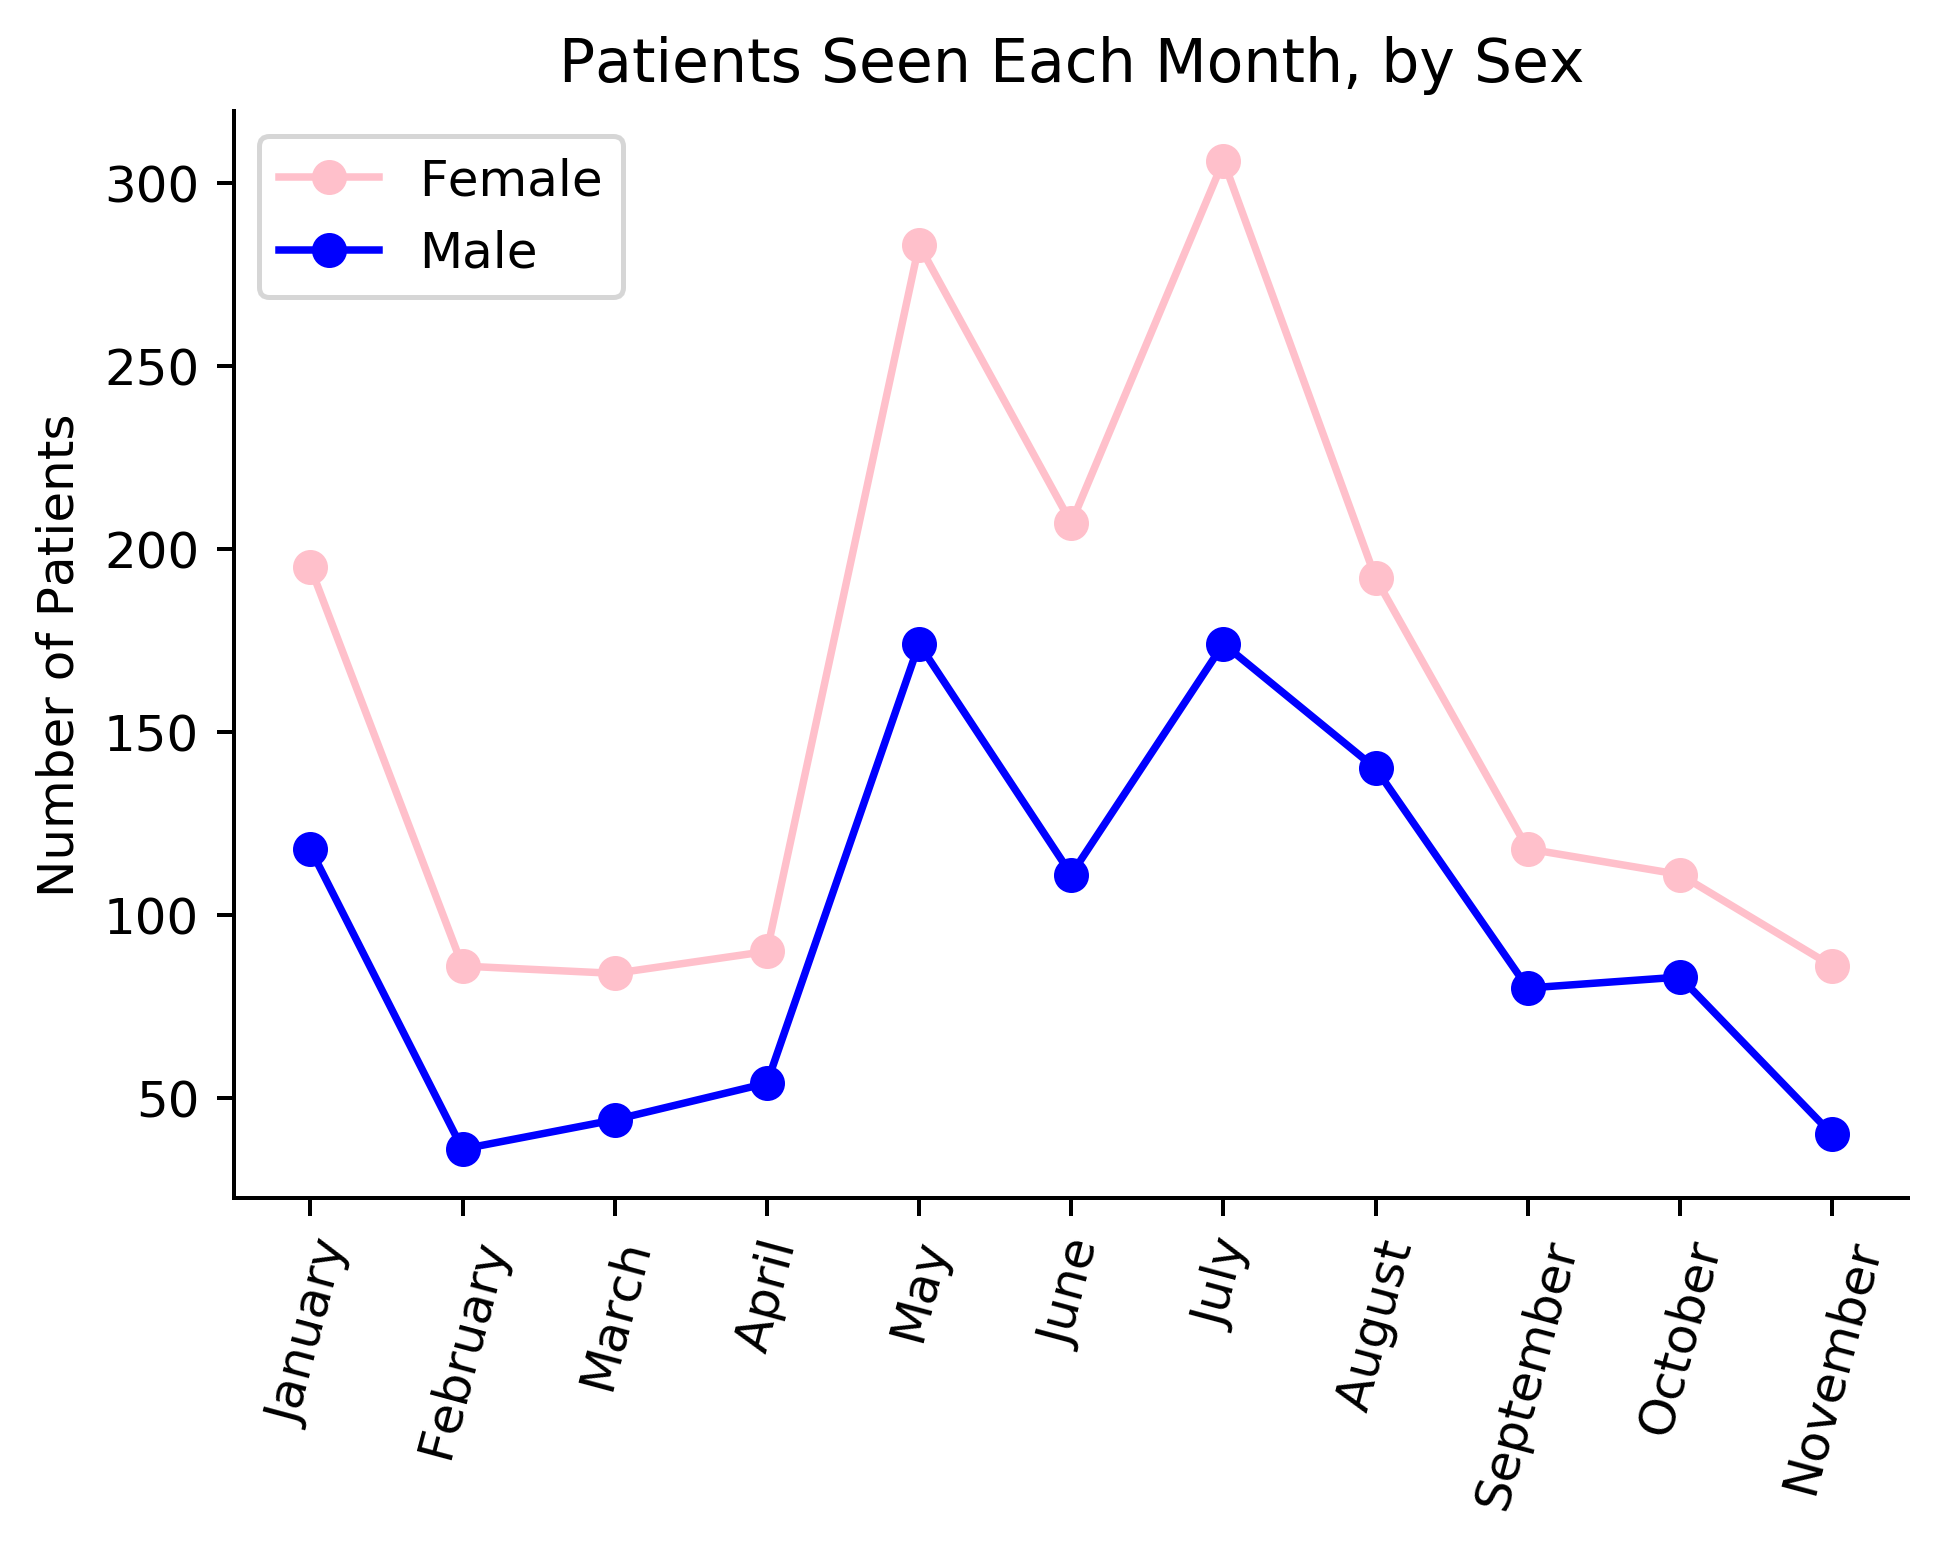

In [242]:
y = np.array(gender_f['Month'])
x = np.array(gender_f['Female'])
z = np.array(gender_m['Male'])

# plt.plot(y, x, z, marker='o')
plt.plot(y, x, "pink", label="Female", marker="o")
plt.plot(y, z, "-b", label="Male", marker="o")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], ['January','February','March','April','May','June','July','August',
                                                  'September','October','November'], rotation=75)
sns.despine();
plt.legend(loc="upper left")
plt.title(('Patients Seen Each Month, by Sex'), fontsize=12)
plt.ylabel('Number of Patients')
plt.show

## The amount of drugs received per visit in 2019

In [256]:
df.Meds.value_counts()

3    1015
2     920
4     459
1     286
5     103
6      23
7       6
Name: Meds, dtype: int64

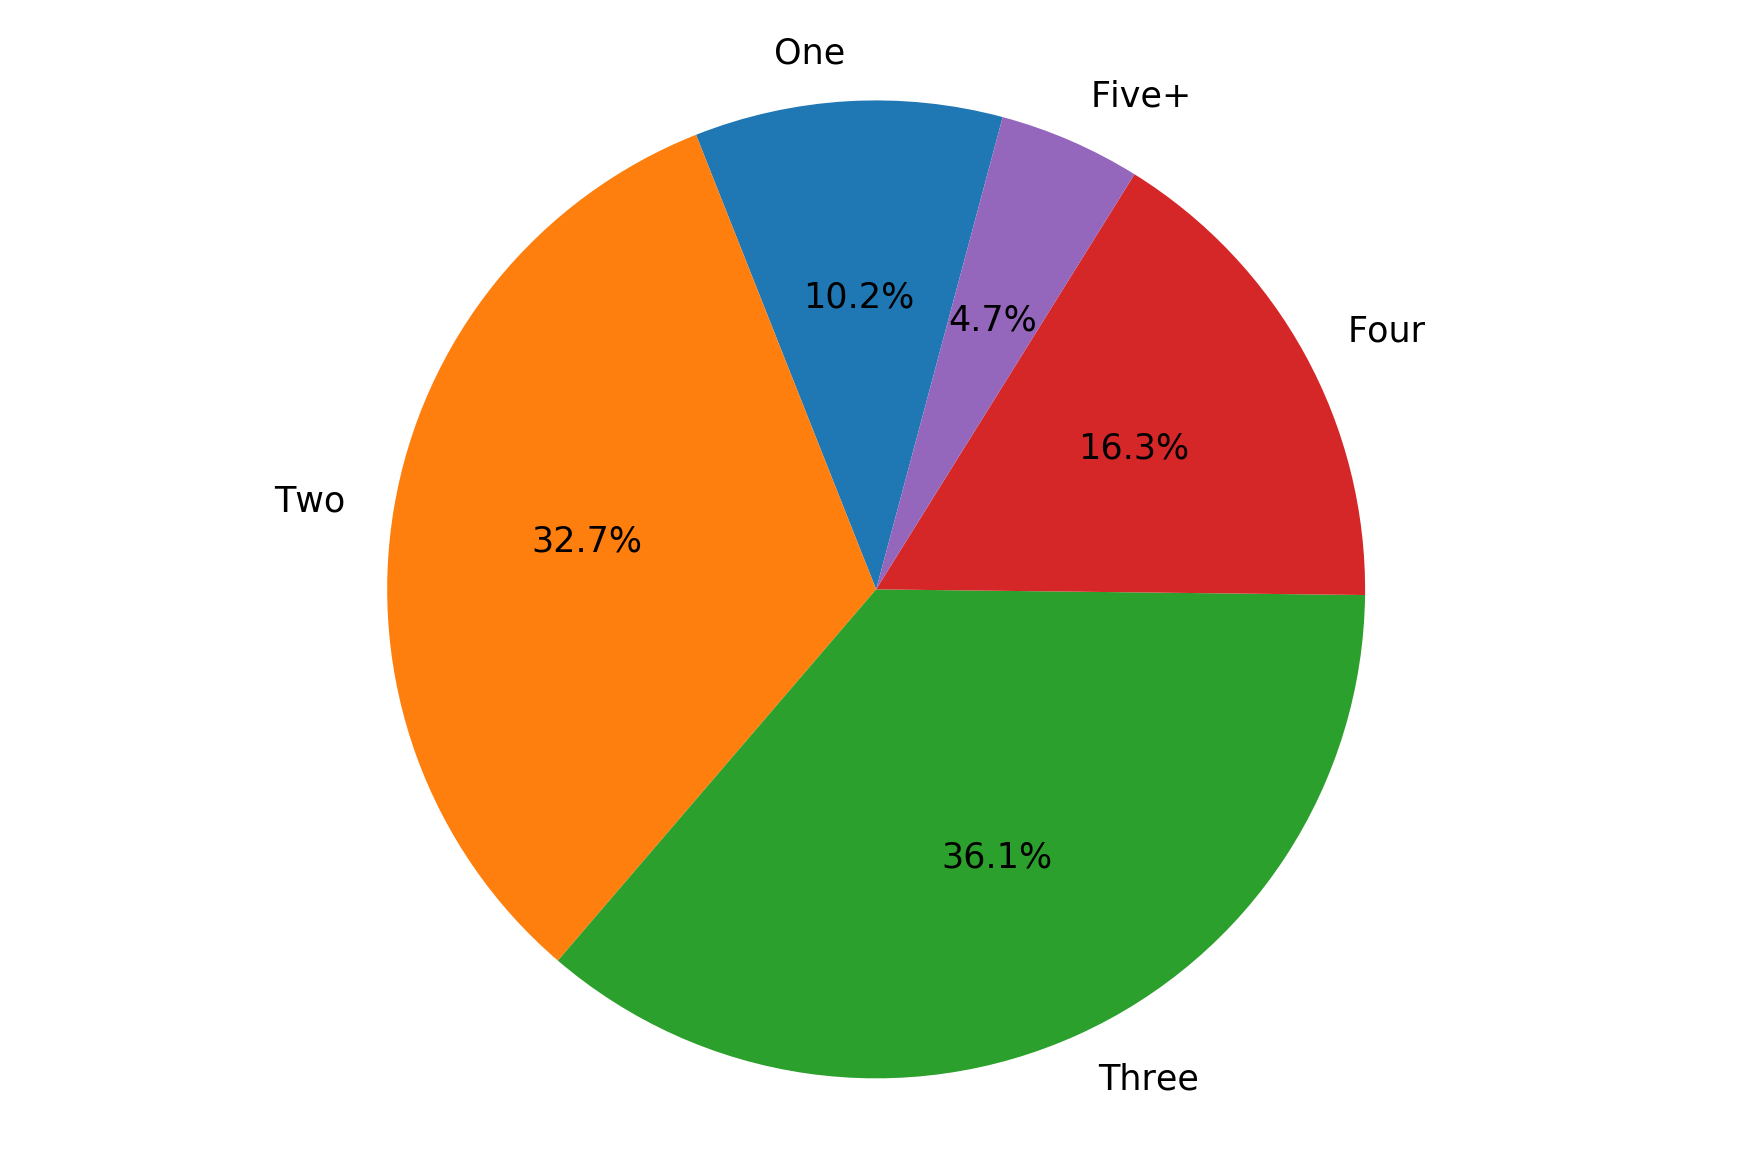

In [298]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'One', 'Two', 'Three', 'Four', 'Five+'
sizes = [286, 920, 1015, 459, 132]
explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=75, textprops={'fontsize': 7})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Who distributed the most drugs in 2020?

In [359]:
df_2.prescribedByName.value_counts()

Jimmy          355
Dr_Victoria    259
Sarah          207
Nakabugo       149
Claire         148
Joanne          73
Name: prescribedByName, dtype: int64

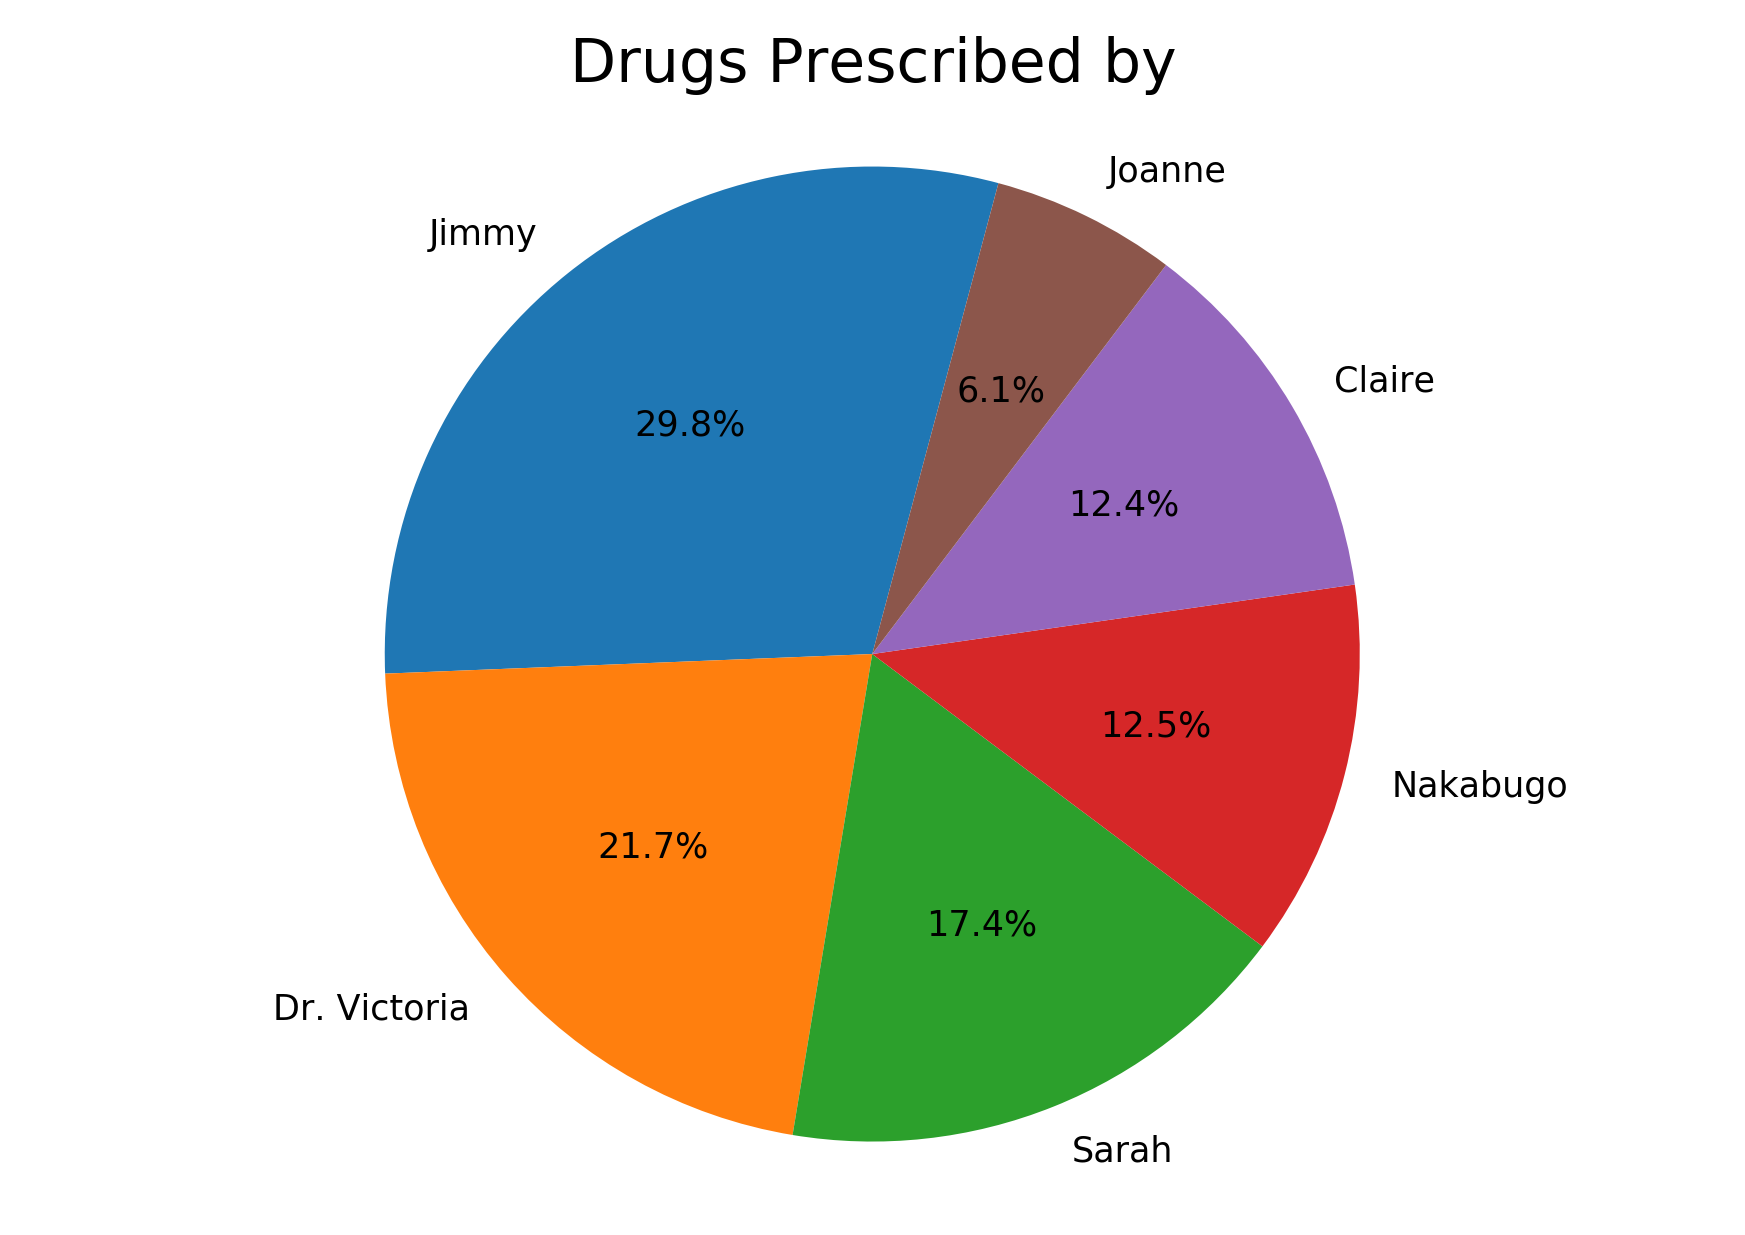

In [361]:
labels = 'Jimmy', 'Dr. Victoria', 'Sarah', 'Nakabugo', 'Claire','Joanne'
sizes = [355, 259, 207, 149, 148, 73]
explode = (0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=75, textprops={'fontsize': 7})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(('Drugs Prescribed by'), fontsize=12)

plt.show()

## What is the cost per patient in 2020?

In [644]:
doc = df_2[['drugName', 'US_PPP', 'prescribedByName']]
doc = doc.groupby(['prescribedByName']).sum().sort_values('US_PPP', ascending=False)
doc

,US_PPP
prescribedByName,
Jimmy,869.23
Dr_Victoria,749.60
Sarah,545.08
Claire,374.86
Nakabugo,344.23
Joanne,151.58


In [584]:
doc_2 = df_2[['drugName', 'prescribedByName']]
#doc_2 = doc_2.groupby(['prescribedByName']).sum()
Sarah = doc_2[doc_2['prescribedByName'].isin(['Sarah'])]
Jimmy = doc_2[doc_2['prescribedByName'].isin(['Jimmy'])]
Joanne = doc_2[doc_2['prescribedByName'].isin(['Joanne'])]
Dr_Victoria = doc_2[doc_2['prescribedByName'].isin(['Dr_Victoria'])]
Nakabugo = doc_2[doc_2['prescribedByName'].isin(['Nakabugo'])]
Claire = doc_2[doc_2['prescribedByName'].isin(['Claire'])]
people = Sarah, Jimmy, Joanne, Dr_Victoria, Nakabugo, Claire
#Claire.drugName.mode()


In [645]:
us_price

,US_PPP,Month
0,544.52,1.0
1,504.62,2.0
2,261.29,3.0
3,220.05,4.0
4,335.55,5.0
5,478.70,6.0
6,824.86,7.0
7,696.35,8.0


In [646]:
us_price = df_2[['Month_num','US_PPP']]
us_price = us_price.dropna()
us_price = us_price.groupby(['Month_num']).sum()
us_price['Month'] = us_price.index
us_price = us_price.reset_index(drop=True)

us_price

,US_PPP,Month
0,544.52,1
1,370.16,2
2,261.29,3
3,220.05,4
4,333.36,5
5,411.47,6
6,488.71,7
7,405.02,8


## Graph of total cost per patient, by month.

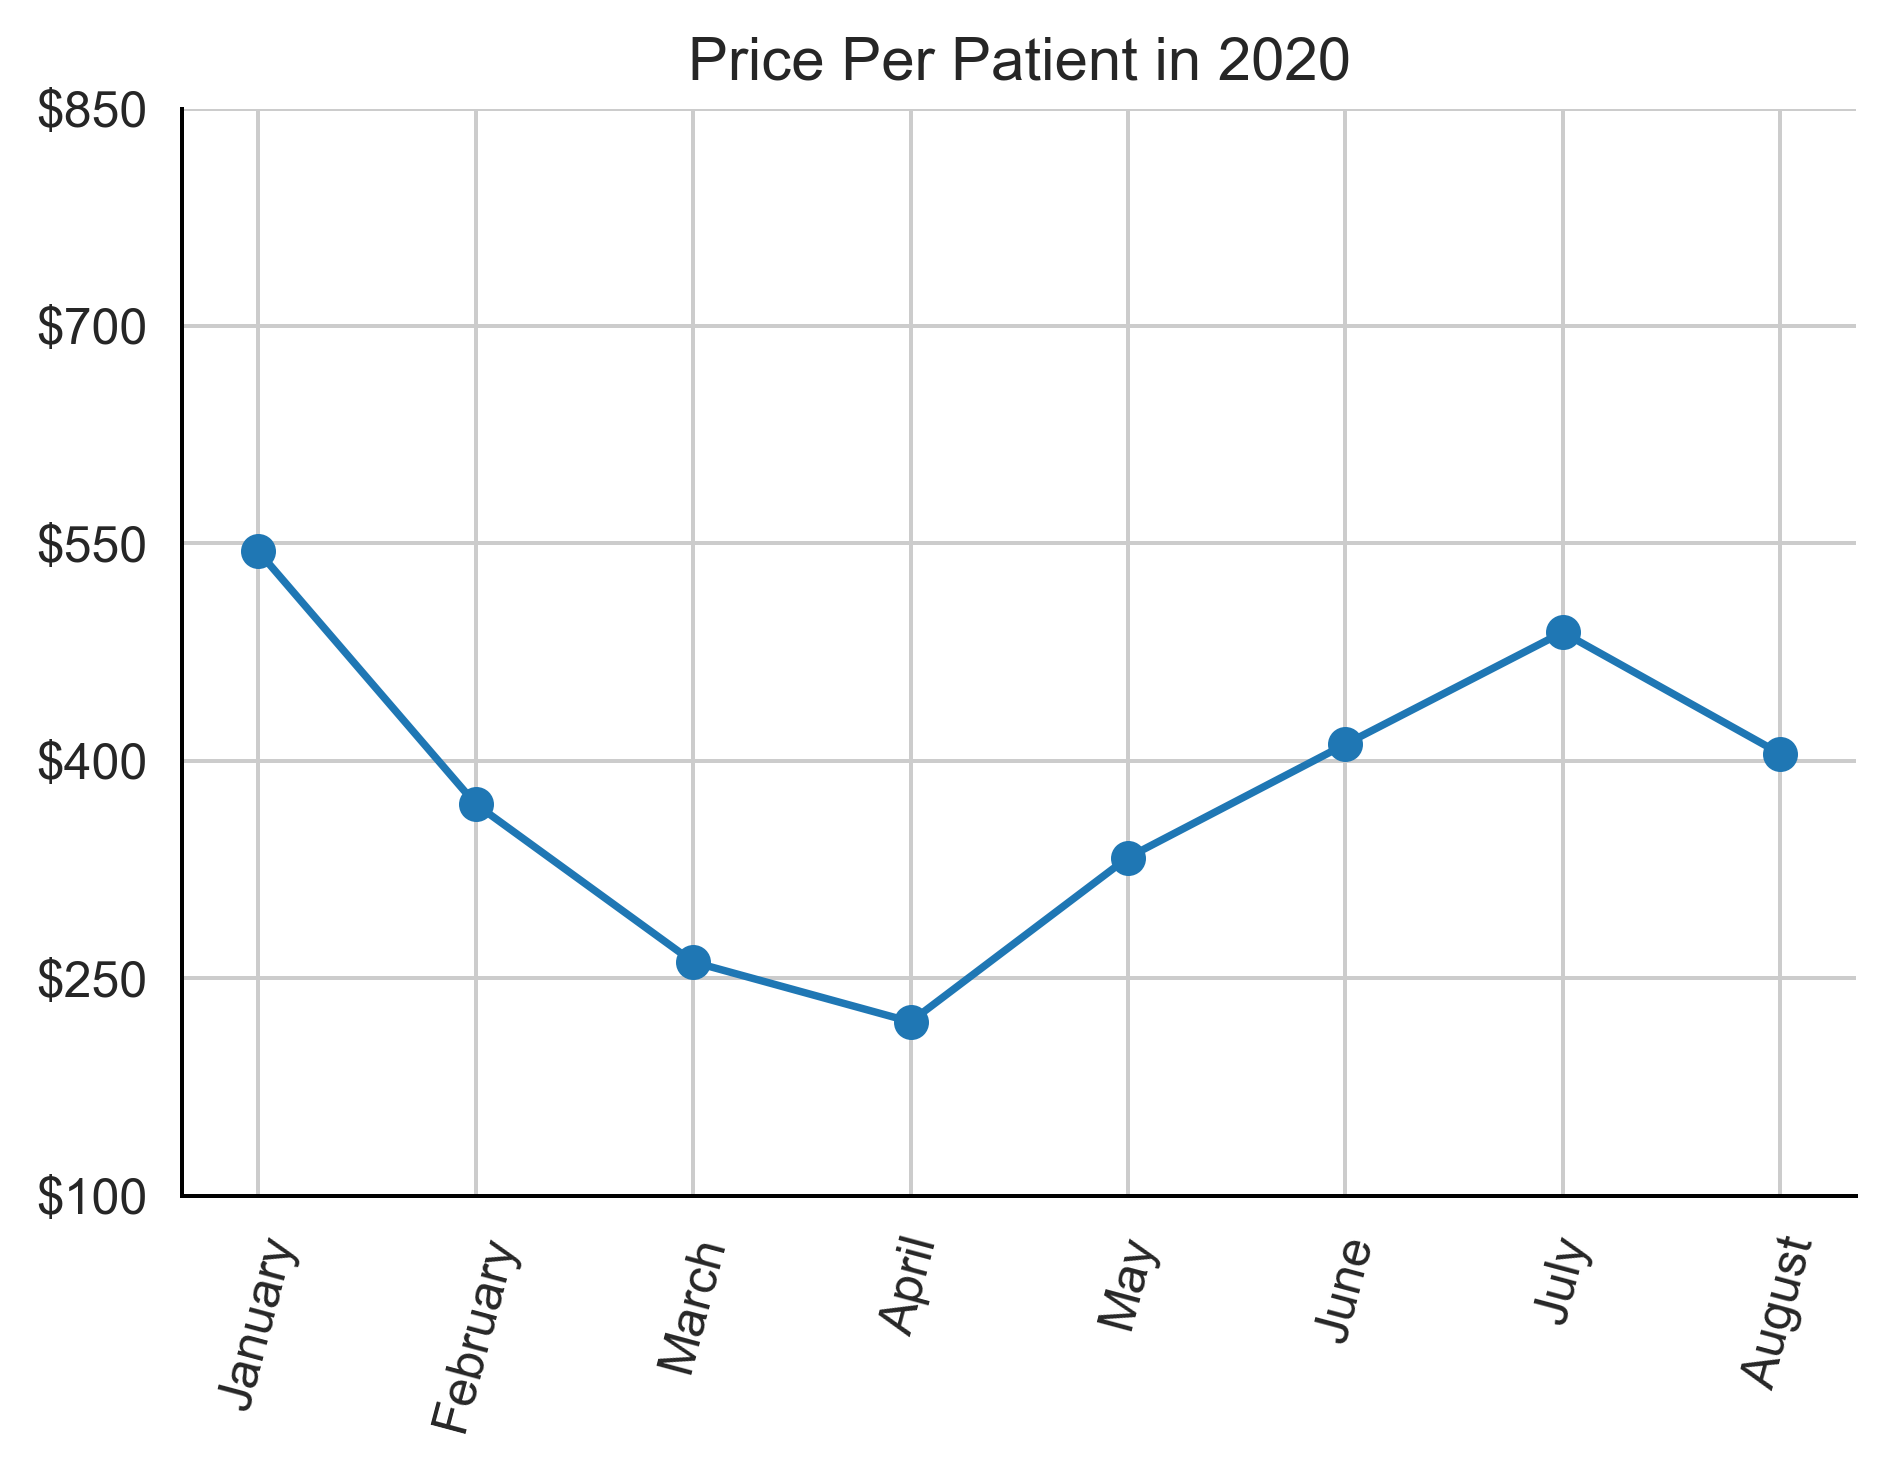

In [647]:
x = np.array(us_price['US_PPP'])
y = np.array(us_price['Month'])
ax.grid(False)
plt.plot(y, x, marker='o')
plt.xticks(rotation=90)
plt.rcParams['figure.dpi'] = 360
plt.figsize=(2,1)
plt.yticks(np.arange(min(x-120), max(x)+100, 150))
plt.xticks([1,2,3,4,5,6,7,8], ['January','February','March','April','May','June','July','August'], rotation=75)
plt.yticks([100,250,400,550,700,850], ['$100','$250','$400','$550','$700','$850'])
plt.title('Price Per Patient in 2020')
sns.despine();

plt.show()

## Finding the average cost per patient in 2020

In [658]:
month = df_2[['Month_num','US_PPP']]
month = month.groupby(['Month_num']).mean()
month['Month'] = month.index
month = month.reset_index(drop=True)

month

,US_PPP,Month
0,2.605359,1
1,2.203333,2
2,2.177417,3
3,2.529310,4
4,3.058349,5
5,2.337898,6
6,2.761073,7
7,2.793241,8


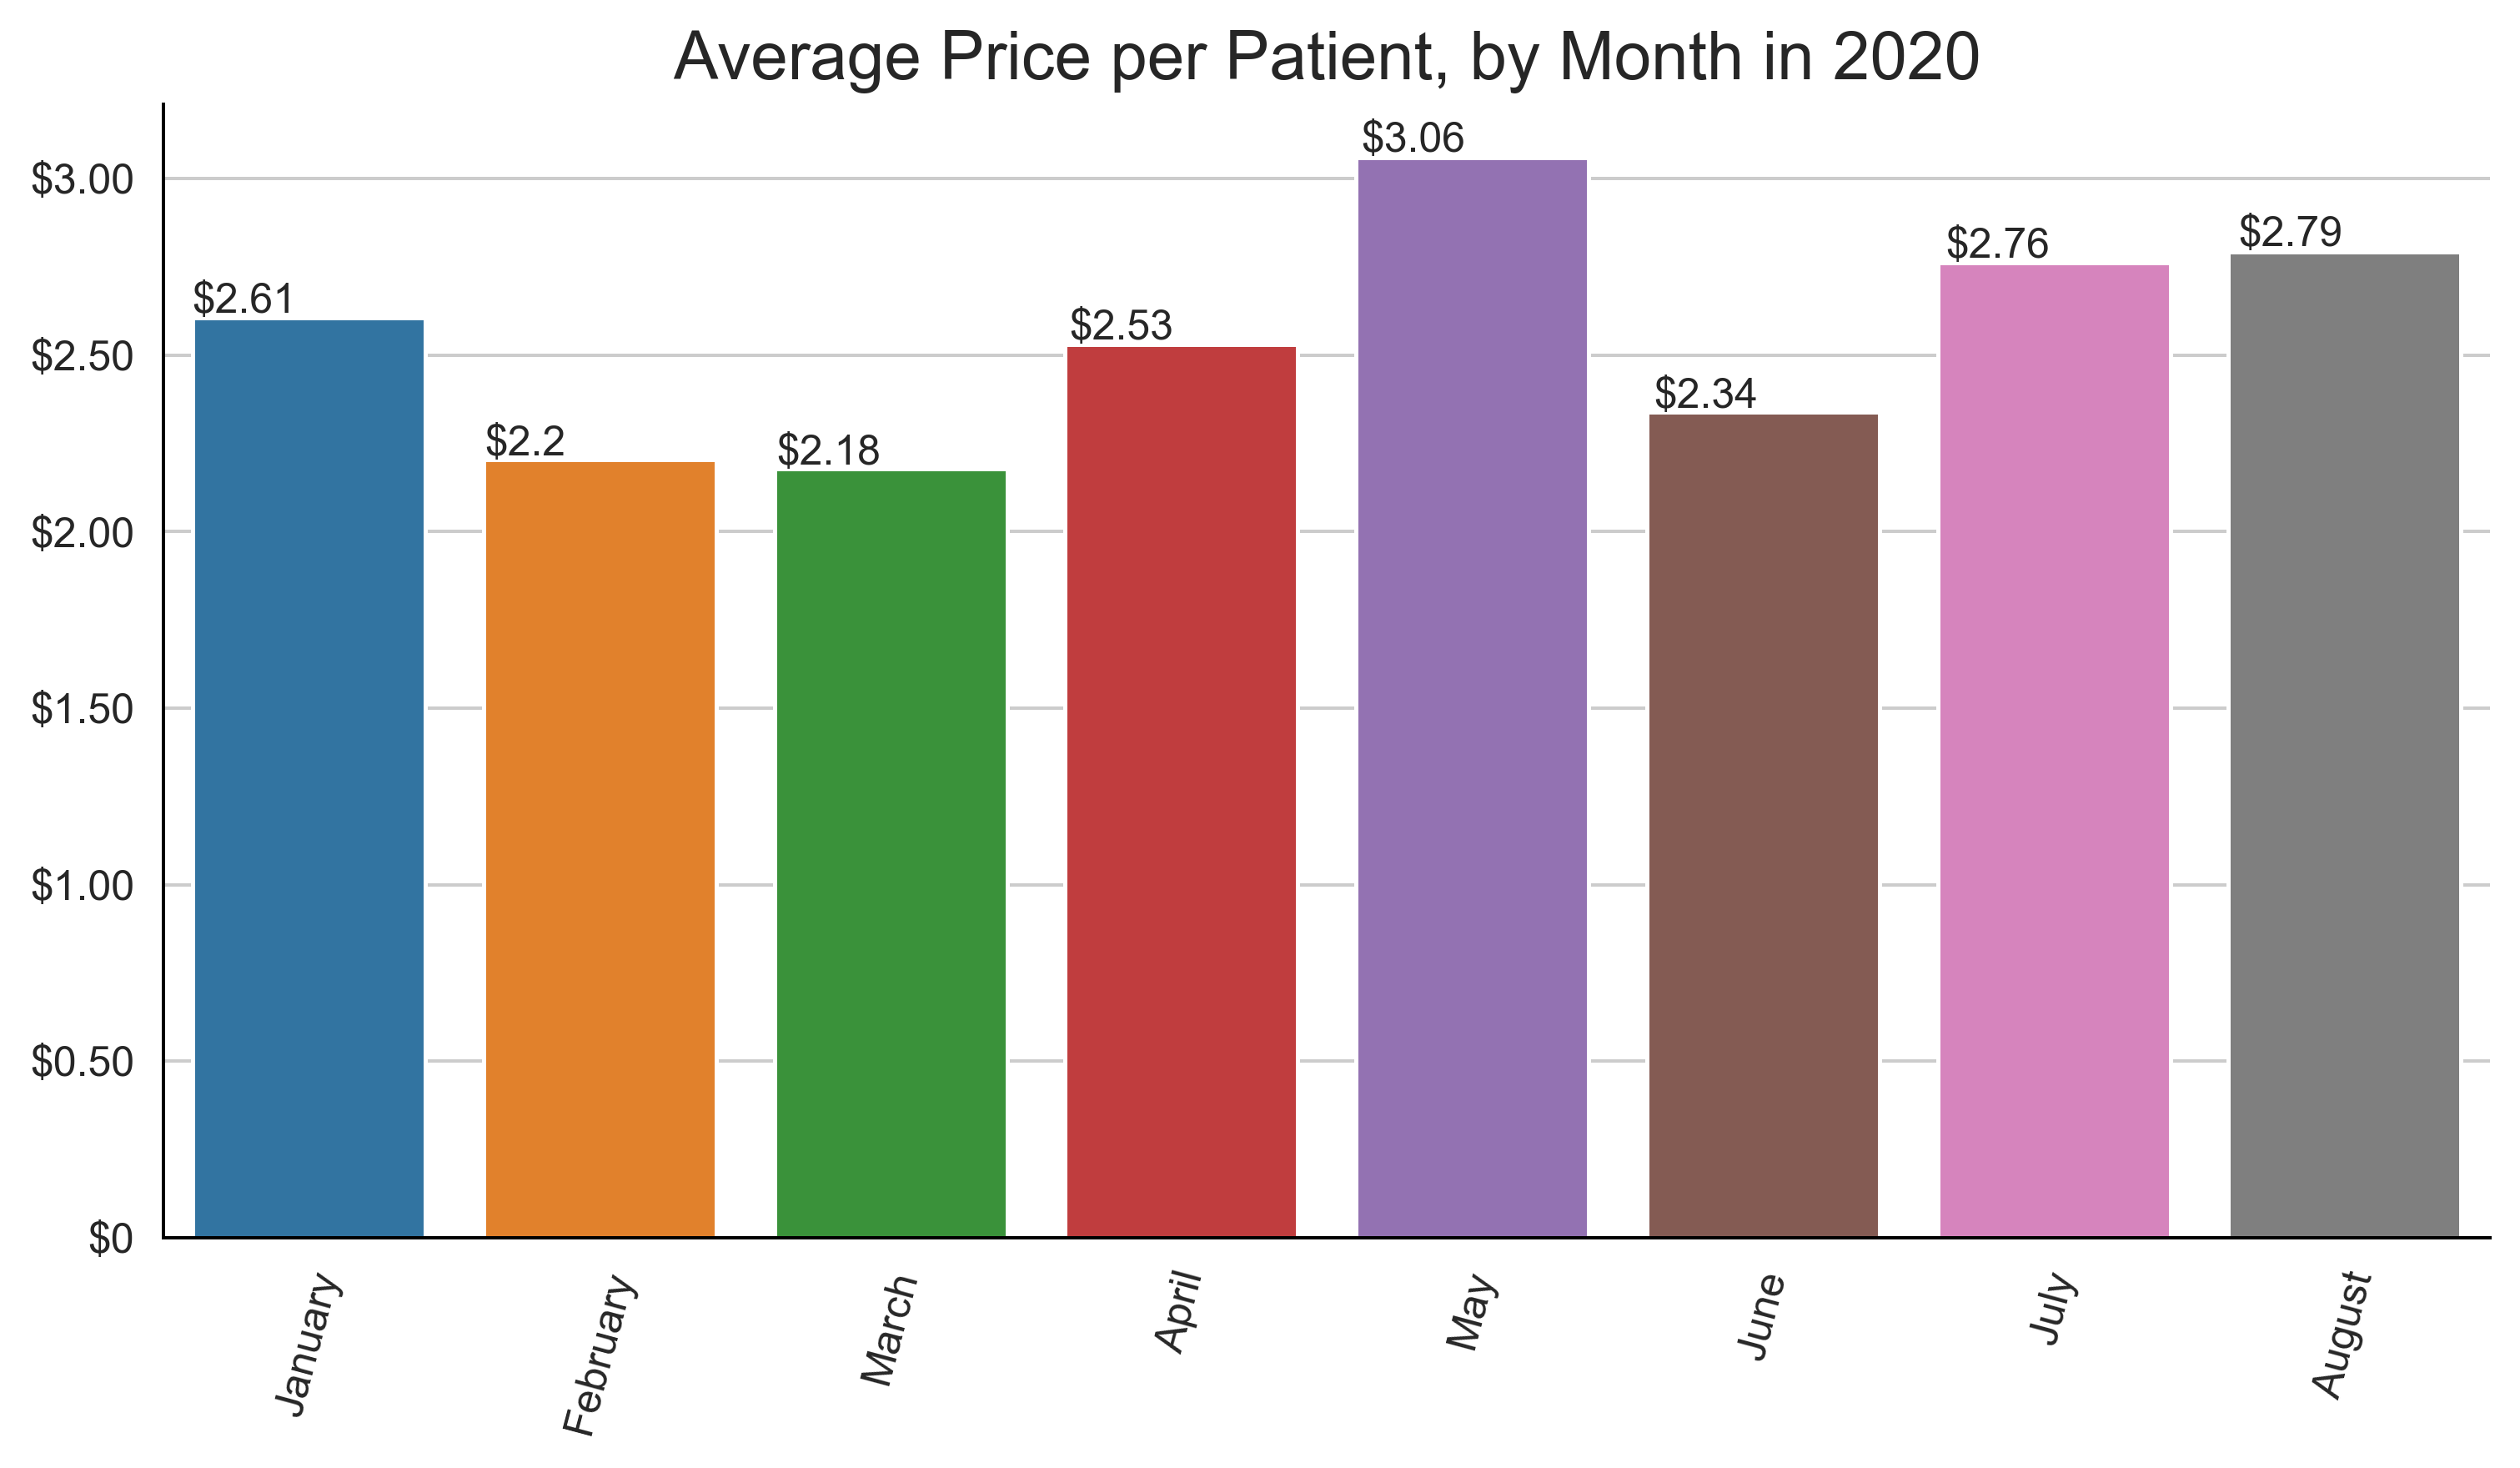

In [663]:
plt.rcParams['figure.dpi'] = 360
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(data=month, x='Month', y="US_PPP", ax=ax)
for p in ax.patches:
    ax.annotate('$'+str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.006))
plt.xticks([0,1,2,3,4,5,6,7], ['January','February','March','April','May','June','July','August'], rotation=75)
plt.yticks([0.0,0.5,1.0,1.5,2.0,2.5,3.0], ['$0','$0.50','$1.00','$1.50','$2.00','$2.50','$3.00'])
plt.xlabel('')
plt.ylabel('')
plt.title(('Average Price per Patient, by Month in 2020'), fontsize=16)
sns.despine();
plt.show()

## Cost of top drugs distributed in 2020

In [460]:
ppp = df_2[['drugName', 'US_PPP']]
ppp = ppp.groupby(['drugName']).sum().sort_values('US_PPP', ascending=False)
ppp = ppp.head(10)
ppp['Drug'] = ppp.index
ppp = ppp[['Drug', 'US_PPP']]
ppp = ppp.reset_index(drop=True)
ppp

,Drug,US_PPP
0,Artesunat Injection,1036.74
1,Artemether_Lumefantrine,999.40
2,Cefixime,319.36
3,Probeta_N,214.36
4,Levofloxacin,186.28
5,Hydrocotisone Cream,138.60
6,Bendroflumethiazide,102.68
7,Nifedipine,93.67
8,Amoxkid,82.01
9,Ampiclox,74.31


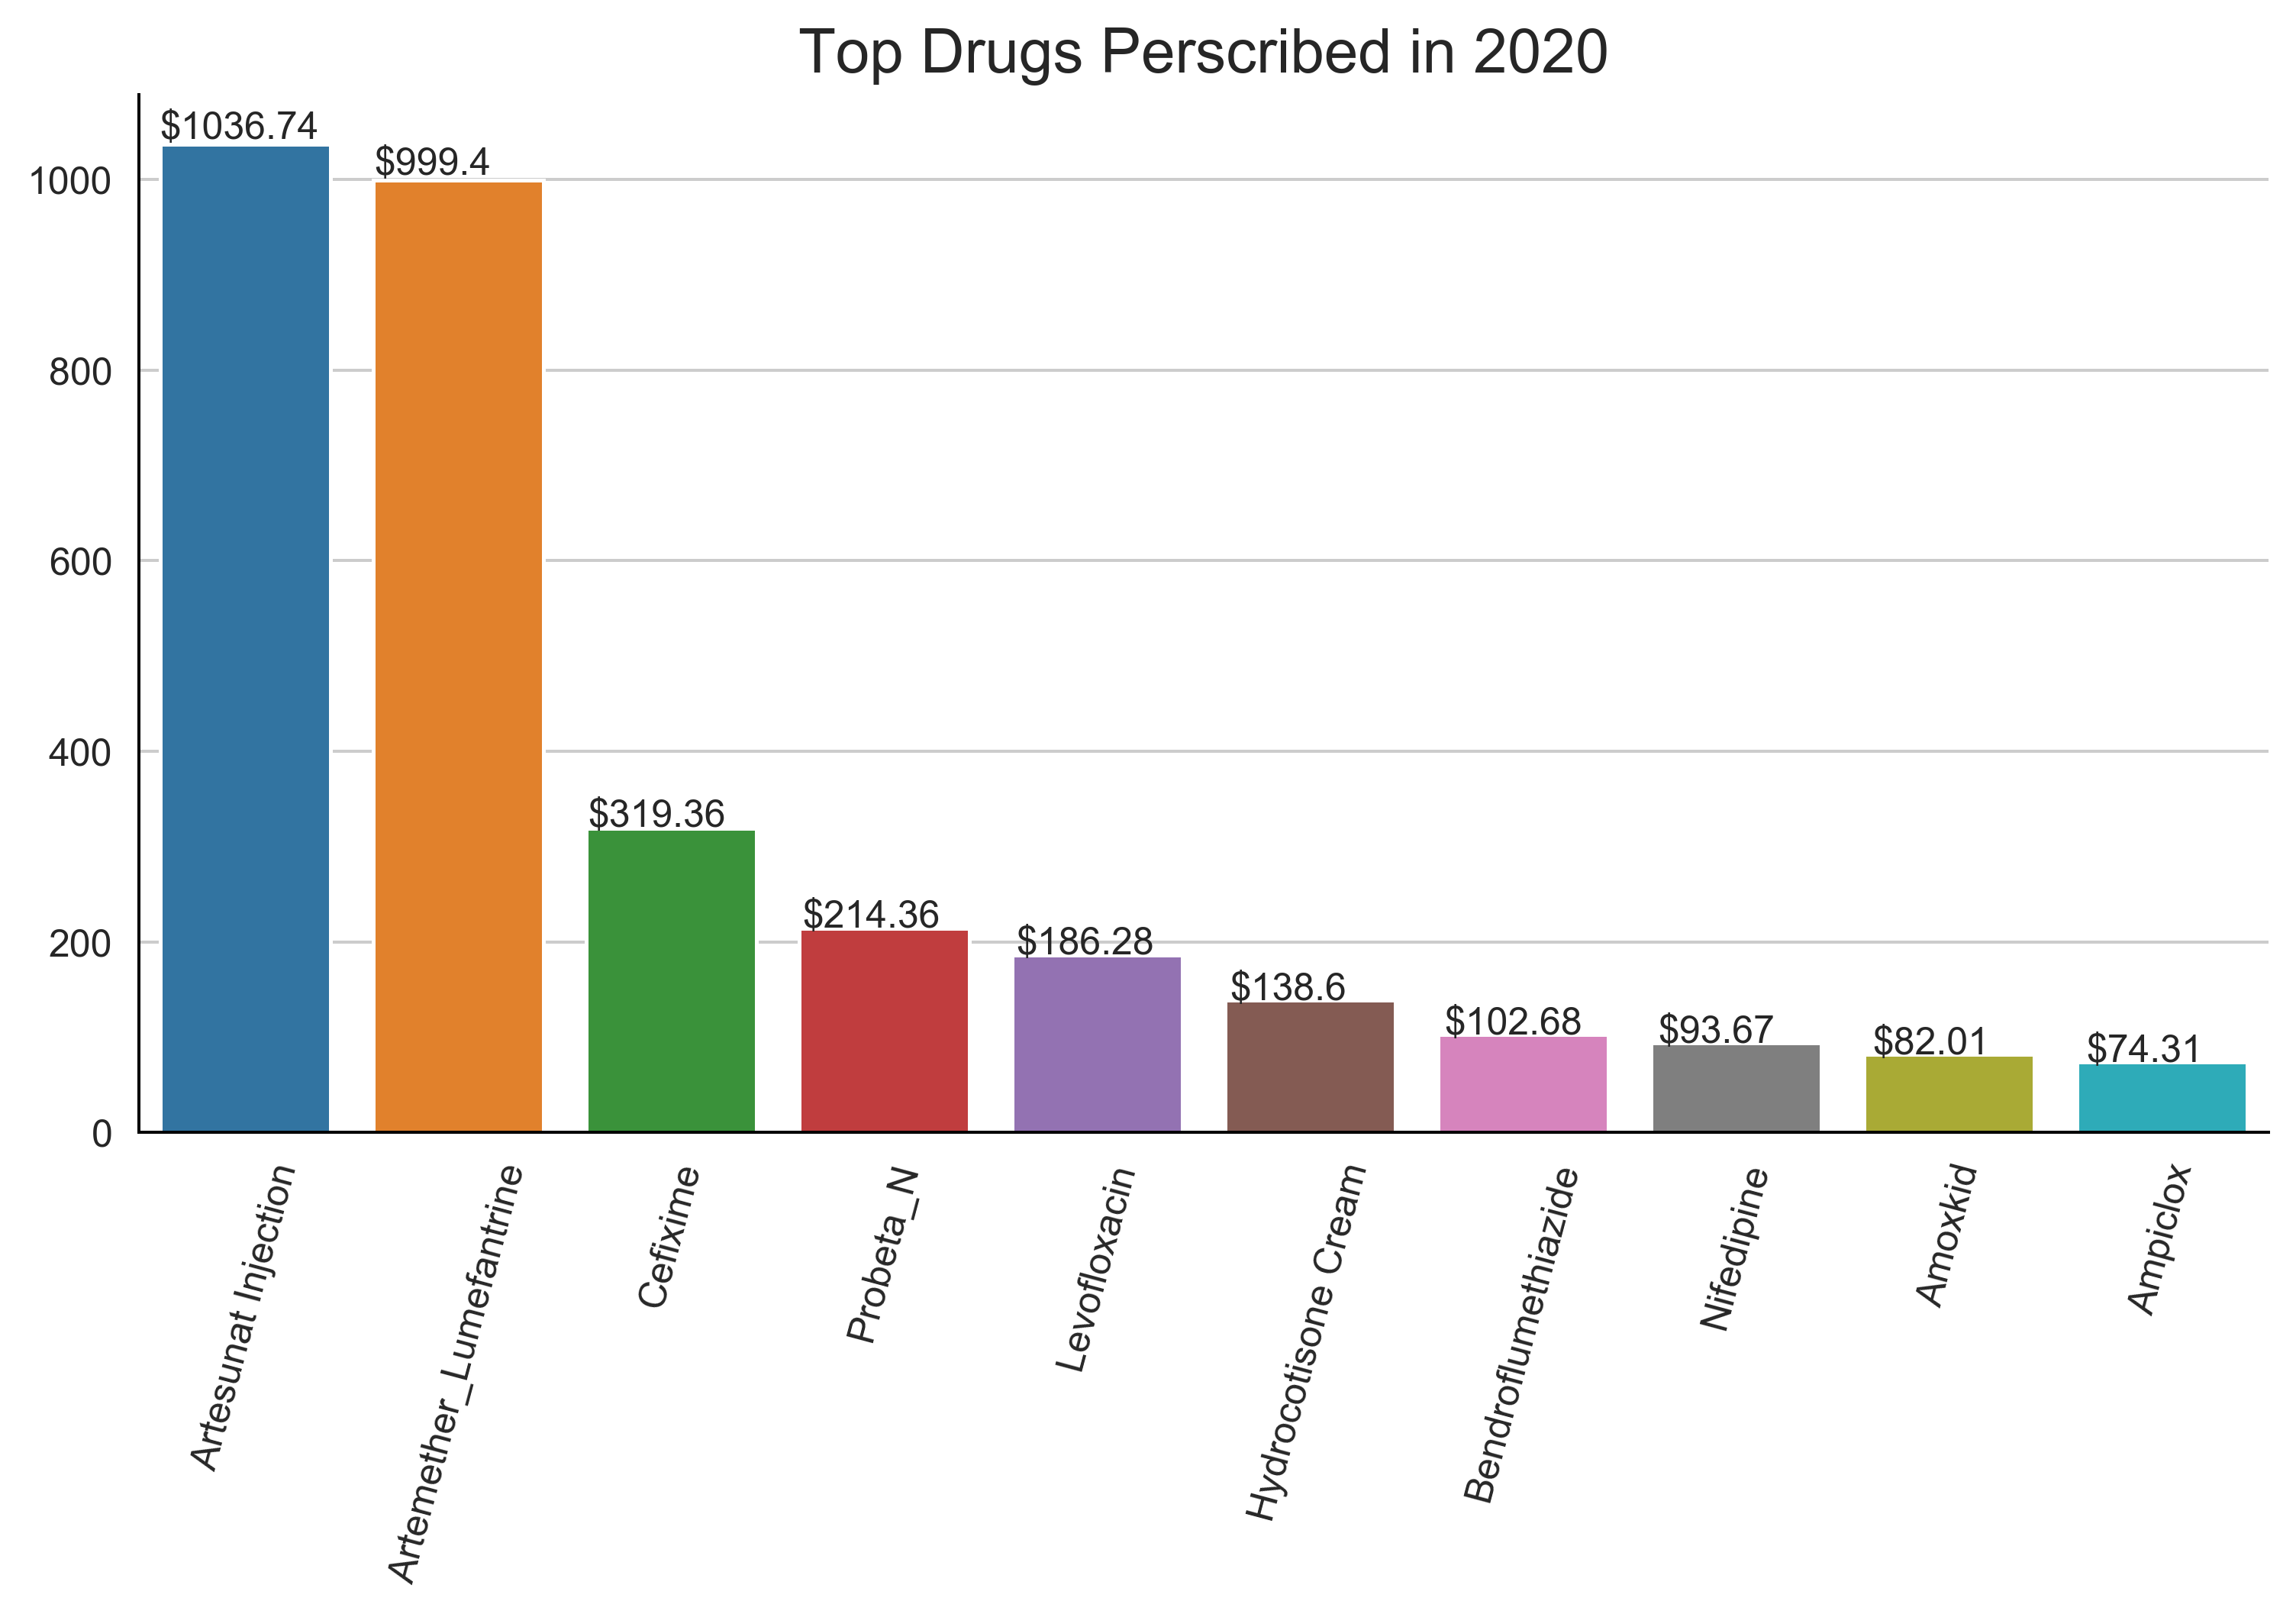

In [723]:
plt.rcParams['figure.dpi'] = 360
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(data=ppp, x='Drug', y="US_PPP", ax=ax)
for p in ax.patches:
    ax.annotate('$'+str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.006))
plt.xticks(rotation=75)
plt.xlabel('')
plt.ylabel('')
plt.title(('Top Drugs Perscribed in 2020'), fontsize=16)
sns.despine();
plt.show()

In [739]:
df_2.head()

,fullName,Month_num,Month_name,drugName,qty_supplied,Ug_Price,US_Price,Unit_Pack,UG_PPM,US_PPM,UG_PPP,US_PPP,prescribedByName
0,Agnes Nabulesa,7,July,Acyclovir,138,7798.0,2.11,100,77.98,0.021,10761.24,2.90,Dr_Victoria
1,Maurencia Nakabugo,1,January,Albendazole,7,10200.0,2.76,100,102.00,0.028,714.00,0.20,Sarah
2,Ramathan Kivumbi,1,January,Albendazole,17,10200.0,2.76,100,102.00,0.028,1734.00,0.48,Jimmy
3,Catherine Nakimuli,2,February,Albendazole,19,10200.0,2.76,100,102.00,0.028,1938.00,0.53,Jimmy
4,Hasifah Nabweteme,2,February,Albendazole,19,10200.0,2.76,100,102.00,0.028,1938.00,0.53,Jimmy


In [748]:
### The average cost of a drug distributed in 2020
df_2.US_Price.mean()

1.670965585424012

In [750]:
### The average cost per patient in 2020
df_2.US_PPP.mean()

2.547926112510496

In [649]:
### Total cost per patient in 2020
df_2.US_PPP.sum()

3034.58

In [753]:
### The most you spent on one patient
df_2.US_PPP.max()

84.15

In [617]:
df_2.drop(df_2.index[[1191]], inplace=True)

In [737]:
price_19 = pd.DataFrame(df_test.columns)
price_19.to_csv('Price_19.csv')

In [9]:
df.Meds.sum()

7702

In [14]:
df_2.qty_supplied.sum()

60098